# Projeto Machine Learning - Predi√ß√£o de Acidentes A√©reos Fatais

## Sum√°rio do Projeto: Predi√ß√£o de Acidentes A√©reos Fatais

### 1. Introdu√ß√£o e Objetivos
#### 1.1. Contexto do Problema
#### 1.2. Objetivos da An√°lise
#### 1.3. Dicion√°rio de Vari√°veis

### 2. Configura√ß√£o do Ambiente

### 3. Carga e An√°lise Inicial dos Dados

### 4. Limpeza e Pr√©-Processamento dos Dados
#### 4.1. Remo√ß√£o de Duplicatas
#### 4.2. Tratamento de Tipos de Dados
#### 4.3. Tratamento de Valores Ausentes (Nulos)

### 5. An√°lise Explorat√≥ria de Dados (EDA)
#### 5.1. Sele√ß√£o de Features e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Target
#### 5.2. Estados com Mais Acidentes Fatais
#### 5.3. Tend√™ncia da Taxa de Fatalidade

### 6. Engenharia e Sele√ß√£o de Features
#### 6.1. Divis√£o dos Dados (Treino/Teste)
#### 6.2. Separa√ß√£o de Features por Tipo
#### 6.3. Encoding e Normaliza√ß√£o

### 7. Modelagem
#### 7.1. Balanceamento de Classes com SMOTE
#### 7.2. Treinamento dos Modelos
#### 7.3. Predi√ß√µes e M√©tricas Iniciais
#### 7.4. Valida√ß√£o Cruzada

### 8. Valida√ß√£o e Compara√ß√£o dos Modelos
#### 8.1. Matrizes de Confus√£o
#### 8.2. Curva ROC e AUC
#### 8.3. An√°lise dos Resultados
#### 8.4. Import√¢ncia das Features
#### 8.5. Otimiza√ß√£o do Threshold

### 9. Regress√£o Log√≠stica - Teste Final
#### 9.1. Matriz de Confus√£o (Threshold Otimizado)
#### 9.2. Curva ROC no Teste Real
#### 9.3. Curva Precis√£o x Recall

### 10. Explainable AI (XAI) - Interpretabilidade de Modelos
#### 10.1. Permutation Importance
#### 10.2. SHAP (SHapley Additive exPlanations)
#### 10.3. Partial Dependence Plots (PDP)
#### 10.4. An√°lise Comparativa das T√©cnicas XAI
#### 10.5. Exporta√ß√£o dos Resultados XAI

---

## Equipe do Projeto

| RA ¬† ¬† ¬†| Nome ¬† ¬† ¬† ¬† ¬† ¬† ¬† ¬† |
|---------|----------------------|
| 1134868 | √Åbner Panazollo ¬† ¬† ¬†|
| 1134433 | Ariel Diefenthaeler ¬†|
| 1134933 | Eduardo Sichelero ¬† ¬†|
| 1134890 | Gabriel Duarte ¬† ¬† ¬† |
| 1135384 | Gabriel Onofre ¬† ¬† ¬† |
| 1134821 | Vitor Quadros ¬† ¬† ¬† ¬†|

---

## 1. Introdu√ß√£o e Objetivos

### 1.1 Contexto do Problema

A seguran√ßa a√©rea √© uma preocupa√ß√£o fundamental no setor de avia√ß√£o. Identificar padr√µes que levam a acidentes fatais pode ajudar autoridades, companhias a√©reas e √≥rg√£os reguladores a tomar medidas preventivas e salvar vidas.

Este projeto foca em analisar dados hist√≥ricos de acidentes a√©reos no Brasil (CENIPA) para construir um modelo preditivo capaz de determinar se um acidente ser√° fatal ou n√£o-fatal com base em caracter√≠sticas do voo, aeronave e condi√ß√µes do acidente.

### 1.2 Objetivos da An√°lise

- **1.** **An√°lise Explorat√≥ria**: Entender os padr√µes de acidentes a√©reos, identificando distribui√ß√µes geogr√°ficas, temporais e caracter√≠sticas das aeronaves envolvidas.
- **2.** **Engenharia de Features**: Criar vari√°veis que ajudem a identificar o risco de fatalidade, incluindo features temporais e categ√≥ricas.
- **3.** **Modelagem Preditiva**: Treinar e avaliar diferentes modelos de Machine Learning (Baseline, Regress√£o Log√≠stica e √Årvore de Decis√£o) para prever a probabilidade de um acidente ser fatal.
- **4.** **Valida√ß√£o**: Avaliar os modelos usando m√∫ltiplas m√©tricas (Acur√°cia, Precis√£o, Recall, F1-Score, AUC-ROC) e otimizar o threshold de decis√£o.

### 1.3 Dicion√°rio de Vari√°veis

O conjunto de dados cont√©m informa√ß√µes sobre acidentes a√©reos no Brasil. As principais vari√°veis incluem:

**Vari√°veis Geogr√°ficas:**
- **latitude/longitude**: Coordenadas do local do acidente
- **regiao**: Regi√£o do Brasil (Norte, Sul, Nordeste, etc.)
- **uf**: Unidade Federativa

**Vari√°veis Temporais:**
- **dt_ocorrencia**: Data do acidente
- **hr_ocorrencia**: Hora do acidente
- **ano_ocorrencia**: Ano extra√≠do da data
- **mes_ocorrencia**: M√™s extra√≠do da data

**Caracter√≠sticas da Aeronave:**
- **modelo_aeronave**: Modelo da aeronave
- **nome_fabricante**: Fabricante da aeronave
- **cat_aeronave**: Categoria da aeronave
- **peso_max_decolagem**: Peso m√°ximo de decolagem
- **numero_assentos**: N√∫mero de assentos

**Vari√°veis Operacionais:**
- **fase_operacao**: Fase do voo (decolagem, cruzeiro, pouso, etc.)
- **op_padronizado**: Opera√ß√£o padronizada

**Vari√°vel Target:**
- **les_fatais_trip**: 1 = Fatal, 0 = N√£o Fatal

## 2. Configura√ß√£o do Ambiente

Nesta se√ß√£o, importamos todas as bibliotecas necess√°rias para a an√°lise, pr√©-processamento e modelagem.

In [108]:
# Bibliotecas para manipula√ß√£o e an√°lise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning e pr√©-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

# Balanceamento de classes
from imblearn.over_sampling import SMOTE

# Configura√ß√µes de visualiza√ß√£o
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
%matplotlib inline

print("‚úì Bibliotecas importadas com sucesso!")

‚úì Bibliotecas importadas com sucesso!


## 3. Carga e An√°lise Inicial dos Dados

Carregamos os dados de treino e realizamos uma verifica√ß√£o inicial para entender sua estrutura, tipos de dados e a presen√ßa de valores ausentes.

In [109]:
# Carregar AMBAS as bases
df_treino = pd.read_csv("docs/treino.csv")
df_teste = pd.read_csv("docs/teste.csv")

print(f"‚úì Base de TREINO: {df_treino.shape[0]} linhas x {df_treino.shape[1]} colunas")
print(f"‚úì Base de TESTE: {df_teste.shape[0]} linhas x {df_teste.shape[1]} colunas")

# Usar apenas treino para desenvolvimento
df = df_treino.copy()

‚úì Base de TREINO: 536 linhas x 14 colunas
‚úì Base de TESTE: 76 linhas x 14 colunas


In [110]:
# Amostra dos dados
df.head()

op_padronizado dt_ocorrencia hr_ocorrencia  \
0             AEROAGRICOLA CHAPADAO LTDA    21/12/1999           NaN   
1           RONDON AVIACAO AGRICOLA LTDA    06/01/2000           NaN   
2  SAPA SERV. AEREO DE PROTECAO AGRICOLA    22/02/2000           NaN   
3             AERO AGRICOLA CAICARA LTDA    10/05/2000           NaN   
4          AVIACAO AGRICOLA RECREIO LTDA    09/11/2000           NaN   

              uf        regiao latitude longitude cat_aeronave fase_operacao  \
0             SP       Sudeste      NaN       NaN          S05           NaN   
1             MT  Centro-Oeste      NaN       NaN          S05           NaN   
2             RS           Sul      NaN       NaN          S05           NaN   
3             SP       Sudeste      NaN       NaN          S05           NaN   
4  Indeterminado           NaN      NaN       NaN          TPP           NaN   

  modelo_aeronave  peso_max_decolagem  numero_assentos    nome_fabricante  \
0       PA-25-235              1315.0              1.0     PIPER AIRCRAFT   
1         EMB-201              1800.0              1.0              NEIVA   
2           A188B              1497.0              1.0    CESSNA AIRCRAFT   
3       PA-25-260              1315.0              1.0     PIPER AIRCRAFT   
4           369HS              1157.0              5.0  HUGHES HELICOPTER   

   les_fatais_trip  
0                0  
1                0  
2                0  
3                0  
4                0

An√°lise Inicial:
- O dataset possui m√∫ltiplas linhas e colunas com informa√ß√µes sobre acidentes a√©reos
- H√° colunas geogr√°ficas (latitude, longitude, regiao, uf)
- Colunas temporais (dt_ocorrencia, hr_ocorrencia)
- Caracter√≠sticas das aeronaves (modelo, fabricante, peso, assentos)
- Vari√°vel target: les_fatais_trip (0 = N√£o Fatal, 1 = Fatal)
- Presen√ßa de valores nulos que precisar√£o de tratamento

In [111]:
# Verificando a estrutura e os tipos de dados do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   op_padronizado      534 non-null    object 
 1   dt_ocorrencia       536 non-null    object 
 2   hr_ocorrencia       365 non-null    object 
 3   uf                  536 non-null    object 
 4   regiao              473 non-null    object 
 5   latitude            382 non-null    object 
 6   longitude           382 non-null    object 
 7   cat_aeronave        536 non-null    object 
 8   fase_operacao       393 non-null    object 
 9   modelo_aeronave     533 non-null    object 
 10  peso_max_decolagem  534 non-null    float64
 11  numero_assentos     534 non-null    float64
 12  nome_fabricante     533 non-null    object 
 13  les_fatais_trip     536 non-null    int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 58.8+ KB


## 4. Limpeza e Pr√©-Processamento dos Dados

Esta etapa √© crucial para garantir a qualidade dos dados que alimentar√£o o modelo.

### 4.1 Remo√ß√£o de Duplicatas

Removemos registros duplicados que podem distorcer a an√°lise.

In [112]:
# Verificando informa√ß√µes antes da remo√ß√£o
print("Antes da remo√ß√£o de duplicatas:")
df.info()

Antes da remo√ß√£o de duplicatas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   op_padronizado      534 non-null    object 
 1   dt_ocorrencia       536 non-null    object 
 2   hr_ocorrencia       365 non-null    object 
 3   uf                  536 non-null    object 
 4   regiao              473 non-null    object 
 5   latitude            382 non-null    object 
 6   longitude           382 non-null    object 
 7   cat_aeronave        536 non-null    object 
 8   fase_operacao       393 non-null    object 
 9   modelo_aeronave     533 non-null    object 
 10  peso_max_decolagem  534 non-null    float64
 11  numero_assentos     534 non-null    float64
 12  nome_fabricante     533 non-null    object 
 13  les_fatais_trip     536 non-null    int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 58.8+ KB


In [113]:
# Removendo duplicatas
linhas_antes = len(df)
df = df.drop_duplicates().reset_index(drop=True)
linhas_depois = len(df)

print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois: {linhas_depois}")
print(f"‚úì Duplicatas removidas: {linhas_antes - linhas_depois}")

Linhas antes: 536
Linhas depois: 510
‚úì Duplicatas removidas: 26


### 4.2 Tratamento de Tipos de Dados

Convertemos colunas para os tipos apropriados (datas, num√©ricos, etc.).

In [114]:
# Converter latitude e longitude para float
df['latitude'] = df['latitude'].astype(str).str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].astype(str).str.replace(',', '.').astype(float)

# Converter data
df['dt_ocorrencia'] = pd.to_datetime(df['dt_ocorrencia'], format='%d/%m/%Y', errors='coerce')

print("Convers√µes realizadas!")
df.info()

Convers√µes realizadas!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   op_padronizado      508 non-null    object        
 1   dt_ocorrencia       510 non-null    datetime64[ns]
 2   hr_ocorrencia       340 non-null    object        
 3   uf                  510 non-null    object        
 4   regiao              447 non-null    object        
 5   latitude            358 non-null    float64       
 6   longitude           358 non-null    float64       
 7   cat_aeronave        510 non-null    object        
 8   fase_operacao       367 non-null    object        
 9   modelo_aeronave     507 non-null    object        
 10  peso_max_decolagem  508 non-null    float64       
 11  numero_assentos     508 non-null    float64       
 12  nome_fabricante     507 non-null    object        
 13  les_fatais_trip     510 no

In [115]:
# Verificar valores nulos
print(df.isnull().sum())

op_padronizado          2
dt_ocorrencia           0
hr_ocorrencia         170
uf                      0
regiao                 63
latitude              152
longitude             152
cat_aeronave            0
fase_operacao         143
modelo_aeronave         3
peso_max_decolagem      2
numero_assentos         2
nome_fabricante         3
les_fatais_trip         0
dtype: int64


### 4.3 Tratamento de Valores Ausentes (Nulos)

- **Preenchimento com mediana**: Para colunas num√©ricas
- **Preenchimento com moda**: Para colunas categ√≥ricas
- **Remo√ß√£o de linhas**: Para dados essenciais ausentes

In [116]:
# Criar novas colunas de ano e m√™s
df['ano_ocorrencia'] = df['dt_ocorrencia'].dt.year
df['mes_ocorrencia'] = df['dt_ocorrencia'].dt.month

print("Novas colunas criadas!")
df[['dt_ocorrencia', 'ano_ocorrencia', 'mes_ocorrencia']].head()

Novas colunas criadas!


dt_ocorrencia  ano_ocorrencia  mes_ocorrencia
0    1999-12-21            1999              12
1    2000-01-06            2000               1
2    2000-02-22            2000               2
3    2000-05-10            2000               5
4    2000-11-09            2000              11

In [117]:
print("\nValores nulos antes do tratamento:")
print(df.isnull().sum())

# Preencher colunas num√©ricas com mediana
df[['peso_max_decolagem', 'numero_assentos']] = df[['peso_max_decolagem', 'numero_assentos']].fillna(df[['peso_max_decolagem', 'numero_assentos']].median())

# Preencher colunas categ√≥ricas com moda
modas = df[['op_padronizado', 'hr_ocorrencia', 'regiao', 'fase_operacao', 'modelo_aeronave', 'nome_fabricante']].mode().iloc[0]
df[['op_padronizado', 'hr_ocorrencia', 'regiao', 'fase_operacao', 'modelo_aeronave', 'nome_fabricante']] = df[['op_padronizado', 'hr_ocorrencia', 'regiao', 'fase_operacao', 'modelo_aeronave', 'nome_fabricante']].fillna(modas)

# Remover linhas com dados essenciais ausentes
df.dropna(subset=['dt_ocorrencia', 'latitude', 'longitude'], inplace=True)

print("\nValores nulos depois do tratamento:")
print(df.isnull().sum())


Valores nulos antes do tratamento:
op_padronizado          2
dt_ocorrencia           0
hr_ocorrencia         170
uf                      0
regiao                 63
latitude              152
longitude             152
cat_aeronave            0
fase_operacao         143
modelo_aeronave         3
peso_max_decolagem      2
numero_assentos         2
nome_fabricante         3
les_fatais_trip         0
ano_ocorrencia          0
mes_ocorrencia          0
dtype: int64

Valores nulos depois do tratamento:
op_padronizado        0
dt_ocorrencia         0
hr_ocorrencia         0
uf                    0
regiao                0
latitude              0
longitude             0
cat_aeronave          0
fase_operacao         0
modelo_aeronave       0
peso_max_decolagem    0
numero_assentos       0
nome_fabricante       0
les_fatais_trip       0
ano_ocorrencia        0
mes_ocorrencia        0
dtype: int64


## 5. An√°lise Explorat√≥ria de Dados (EDA)

### 5.1 Sele√ß√£o de Features e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Target
- Selecionando features e target, e verificando o balanceamento das classes


Features selecionadas: 12
Total de registros: 358

Distribui√ß√£o da vari√°vel target:
les_fatais_trip
0    307
1     51
Name: count, dtype: int64


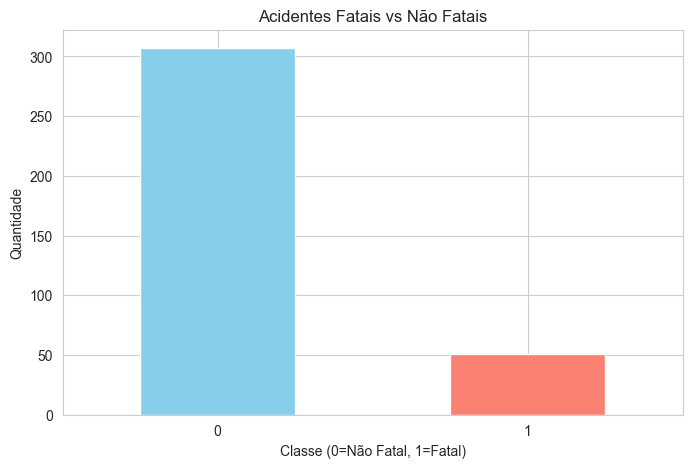

In [118]:
# Selecionar features e target
features = ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos',
            'fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 
            'nome_fabricante', 'ano_ocorrencia', 'mes_ocorrencia']

X = df[features]
y = df['les_fatais_trip']

print(f"Features selecionadas: {X.shape[1]}")
print(f"Total de registros: {X.shape[0]}")

# Verificar balanceamento
print("\nDistribui√ß√£o da vari√°vel target:")
print(y.value_counts())

# Visualizar balanceamento
plt.figure(figsize=(8, 5))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Acidentes Fatais vs N√£o Fatais')
plt.xlabel('Classe (0=N√£o Fatal, 1=Fatal)')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

### 5.2 Estados com mais acidentes fatais
- Identificando e plotando os 5 estados com mais acidentes fatais


Gerando Gr√°fico: Top 5 UFs com mais Acidentes FATAIS...


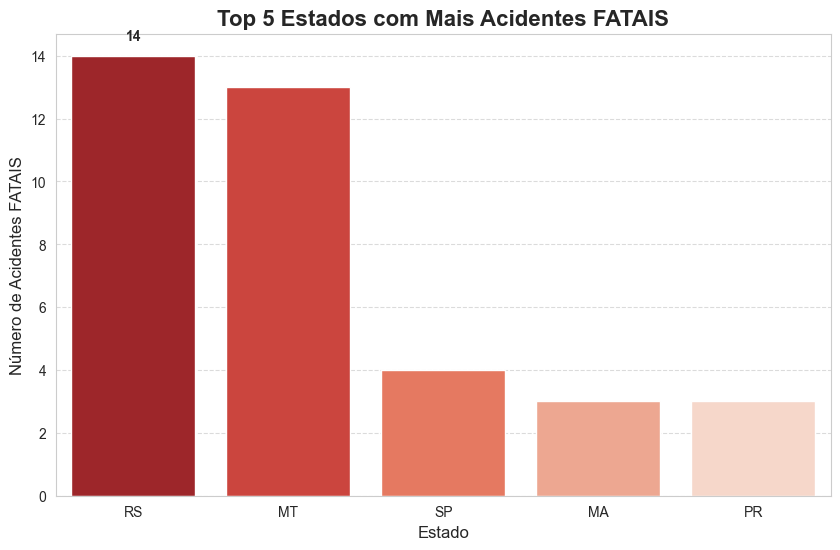

In [119]:
print("Gerando Gr√°fico: Top 5 UFs com mais Acidentes FATAIS...")

df_fatais = df[df['les_fatais_trip'] == 1]
top_5_ufs_fatais = df_fatais['uf'].value_counts().head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_5_ufs_fatais.index, 
    y=top_5_ufs_fatais.values, 
    palette='Reds_r',
    order=top_5_ufs_fatais.index
)

plt.title('Top 5 Estados com Mais Acidentes FATAIS', fontsize=16, fontweight='bold')
plt.xlabel('Estado', fontsize=12)
plt.ylabel('N√∫mero de Acidentes FATAIS', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar r√≥tulos automaticamente
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontweight='bold', padding=9)

plt.show()

### 5.3 Tend√™ncia da Taxa de Fatalidade
- Calculando e plotando a tend√™ncia anual da taxa de fatalidade


Gerando Gr√°fico: Tend√™ncia da Taxa de Fatalidade...


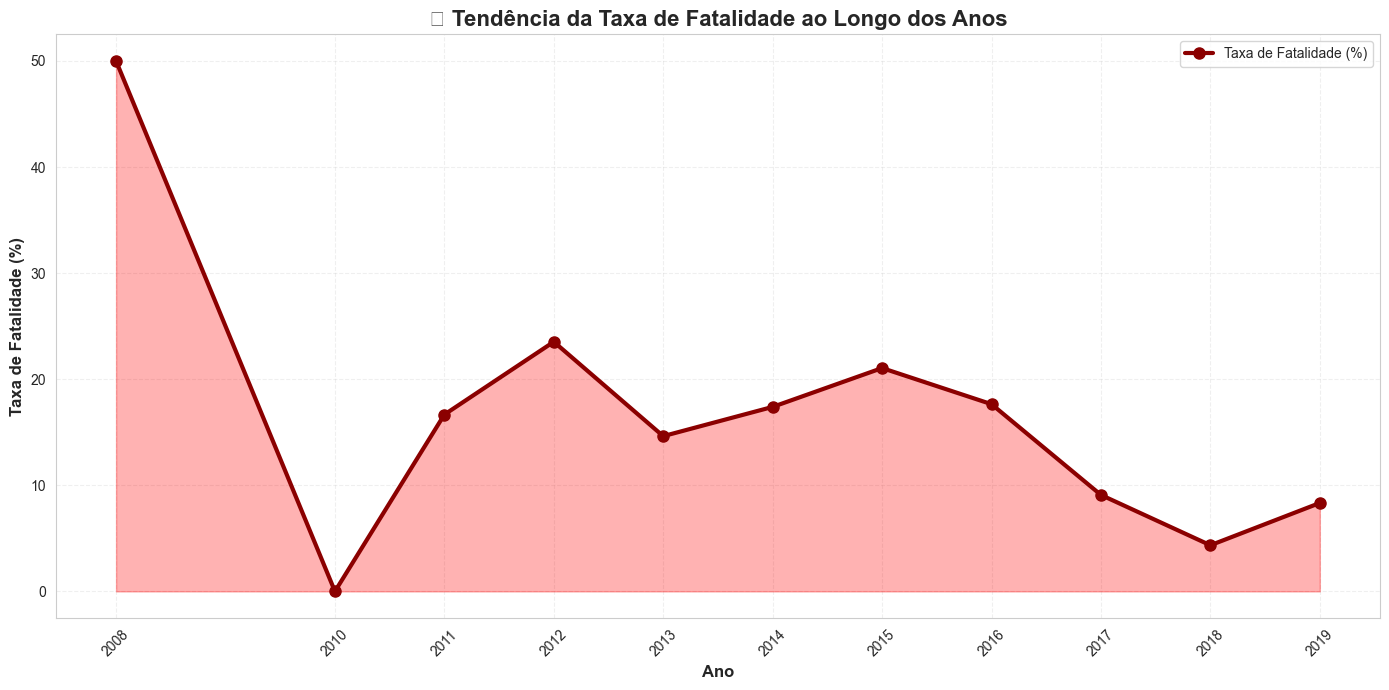

In [120]:

print("Gerando Gr√°fico: Tend√™ncia da Taxa de Fatalidade...")

# 1. Agrupar acidentes fatais (les_fatais_trip == 1) por ano
# Usamos .reindex(df['ano_ocorrencia'].unique()).fillna(0) para garantir que anos sem acidentes fatais apare√ßam como 0
acidentes_fatais_ano = df[df['les_fatais_trip'] == 1].groupby('ano_ocorrencia').size()

# 2. Agrupar TODOS os acidentes por ano
acidentes_totais_ano = df.groupby('ano_ocorrencia').size()

# 3. Calcular a taxa de fatalidade (em %) para cada ano
# .fillna(0) √© usado para anos que n√£o tiveram acidentes fatais
taxa_fatalidade = (acidentes_fatais_ano / acidentes_totais_ano * 100).fillna(0)

# 4. Criar o gr√°fico
plt.figure(figsize=(14, 7)) # Tamanho bom para um gr√°fico de linha
ax = plt.gca() # Pega o eixo atual

# 5. Plotar a linha
ax.plot(taxa_fatalidade.index, taxa_fatalidade.values, marker='o', 
        linewidth=3, markersize=8, color='darkred', label='Taxa de Fatalidade (%)')

# 6. Adicionar a √°rea preenchida abaixo da linha (como no seu exemplo)
ax.fill_between(taxa_fatalidade.index, taxa_fatalidade.values, alpha=0.3, color='red')

# 7. Configurar T√≠tulos e R√≥tulos
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Taxa de Fatalidade (%)', fontsize=12, fontweight='bold')
ax.set_title('üìà Tend√™ncia da Taxa de Fatalidade ao Longo dos Anos', 
              fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')


plt.xticks(taxa_fatalidade.index.astype(int), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## 6. Engenharia e Sele√ß√£o de Features

### 6.1 Divis√£o dos Dados (Treino/Teste)
- Separando os dados em treino e teste para treinar e avaliar o modelo


In [121]:
# Explica√ß√£o do que ta acontecendo aqui: 

#Essa parte ele pega 50% do modelo para previs√£o e tranca 50% para teste, assim o modelo posteriormente vai pegar o restante dos dados 50% e testar se ele vai descobrir se um acidente foi fatal ou n√£o.
# Se ele tiver todas as respostas, ele n√£o vai conseguir prever um acidente "novo", e falhar√° miser√°velmente.

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Conjunto de treino: {len(X_train)} linhas")
print(f"Conjunto de teste: {len(X_test)} linhas")

Conjunto de treino: 250 linhas
Conjunto de teste: 108 linhas


### 6.2 Separa√ß√£o de Features por Tipo
- Identificando quais colunas s√£o num√©ricas e quais s√£o categ√≥ricas


In [122]:
## Explica√ß√£o do que ta acontecendo aqui:

# O c√≥digo n√£o vai entender as palavras, ent√£o precisa converter pra n√∫meros
# Essa parte s√≥ separa em duas colunas, o restante est√° no 6.3...

# Separar colunas num√©ricas e categ√≥ricas
colunas_numericas = ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 
                     'ano_ocorrencia', 'mes_ocorrencia']
colunas_categoricas = ['fase_operacao', 'cat_aeronave', 'regiao', 'uf', 
                       'modelo_aeronave', 'nome_fabricante']

print("Colunas num√©ricas:", colunas_numericas)
print("Colunas categ√≥ricas:", colunas_categoricas)

Colunas num√©ricas: ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 'ano_ocorrencia', 'mes_ocorrencia']
Colunas categ√≥ricas: ['fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 'nome_fabricante']


### 6.3 Encoding e Normaliza√ß√£o
- Transformando categorias em n√∫meros e normalizando as colunas num√©ricas


In [123]:
# Explica√ß√£o do que ta acontecendo aqui
#Encoding: Converter as colunas categ√≥ricas, que s√£o texto (ex: "Sul", "SP"), em um formato num√©rico (usando pd.get_dummies) que o modelo consiga processar.
#Normaliza√ß√£o: Colocar todas as features num√©ricas na mesma escala (usando StandardScaler) para que nenhuma vari√°vel domine o modelo apenas por ter n√∫meros maiores.


# Codificar vari√°veis categ√≥ricas com get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=colunas_categoricas)
X_test_encoded = pd.get_dummies(X_test, columns=colunas_categoricas)

# Garantir que treino e teste tenham as mesmas colunas
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print(f"Features ap√≥s encoding: {X_train_encoded.shape[1]}")

# Normalizar features num√©ricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print("Pr√©-processamento conclu√≠do!")

Features ap√≥s encoding: 82
Pr√©-processamento conclu√≠do!


## 7. Modelagem

### 7.1 Balanceamento de Classes com SMOTE
- Utilizamos o SMOTE para balancear as classes do conjunto de treino, criando novos exemplos da classe com menos dados (acidentes fatais).

Antes do SMOTE:
Classe 0 (N√£o Fatal): 214
Classe 1 (Fatal): 36

Depois do SMOTE:
Classe 0 (N√£o Fatal): 214
Classe 1 (Fatal): 214


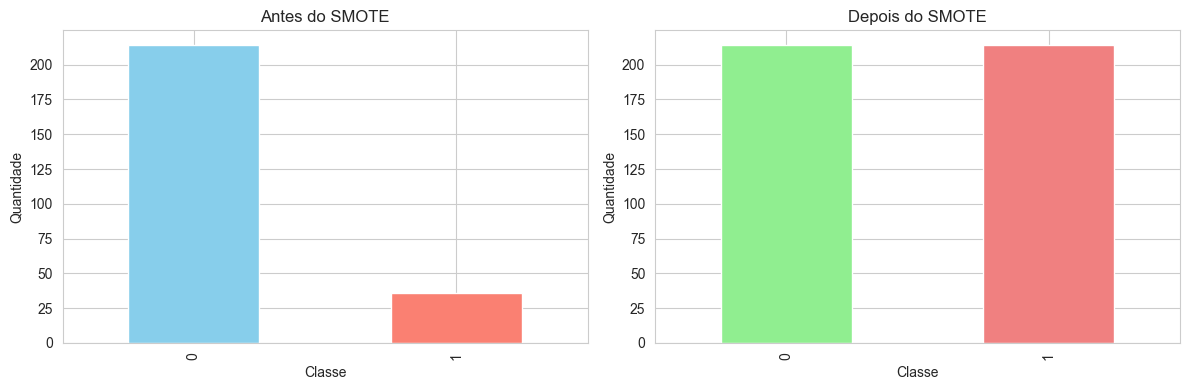

In [124]:
# Aplicar SMOTE para balancear as classes
print("Antes do SMOTE:")
print(f"Classe 0 (N√£o Fatal): {sum(y_train == 0)}")
print(f"Classe 1 (Fatal): {sum(y_train == 1)}")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nDepois do SMOTE:")
print(f"Classe 0 (N√£o Fatal): {sum(y_train_balanced == 0)}")
print(f"Classe 1 (Fatal): {sum(y_train_balanced == 1)}")

# Visualizar balanceamento
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

pd.Series(y_train).value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Antes do SMOTE')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Quantidade')

pd.Series(y_train_balanced).value_counts().plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightcoral'])
axes[1].set_title('Depois do SMOTE')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

### 7.2 Treinamento dos Modelos

Treinamos cinco modelos para compara√ß√£o (todos usando dados balanceados com SMOTE):
- **Baseline (Dummy)**: Modelo simples de refer√™ncia
- **Regress√£o Log√≠stica**: Modelo linear com dados balanceados
- **√Årvore de Decis√£o**: Modelo n√£o-linear baseado em regras
- **Random Forest**: Ensemble de √°rvores de decis√£o
- **Rede Neural (MLP)**: Modelo de deep learning

In [125]:
## Treinamento dos modelos (todos usando dados balanceados)

# 1. Modelo Baseline (Dummy) - refer√™ncia simples. Usamos os dados balanceados para que a avalia√ß√£o seja consistente
modelo_baseline = DummyClassifier(strategy='most_frequent', random_state=42)
# Treinamos o baseline com os dados balanceados (X e y) gerados pelo SMOTE/oversampling
modelo_baseline.fit(X_train_balanced, y_train_balanced)

# 2. Regress√£o Log√≠stica com dados balanceados -- principal modelo com SMOTE
modelo_logistica = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistica.fit(X_train_balanced, y_train_balanced)

# 3. √Årvore de Decis√£o -- agora tamb√©m treinada com dados balanceados
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train_balanced, y_train_balanced)

# 4. Random Forest -- utiliza dados balanceados com SMOTE
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_train_balanced, y_train_balanced)

# 5. Rede Neural (MLP) -- utiliza dados balanceados com SMOTE
from sklearn.neural_network import MLPClassifier
modelo_nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
modelo_nn.fit(X_train_balanced, y_train_balanced)

print("Modelos treinados com sucesso!")
print("Total de modelos: 5 (Baseline, Regressao Logistica, Arvore de Decisao, Random Forest, Rede Neural)")

Modelos treinados com sucesso!
Total de modelos: 5 (Baseline, Regressao Logistica, Arvore de Decisao, Random Forest, Rede Neural)


### 7.3 Predi√ß√µes e M√©tricas Iniciais
- Testamos os modelos treinados com os dados de teste e comparamos o desempenho de cada um usando m√©tricas como
- acur√°cia, precis√£o, recall e F1-Score. Depois mostra qual modelo teve o melhor resultado.

In [126]:
## Explica√ß√£o do que ta acontecendo aqui

## Aqui ele est√° fazendo a prova real, ele est√° pegando o modelo treinando e jogando mais dados para ele verificar

# Fazer predi√ß√µes dos 5 modelos
y_preds = [
    modelo_baseline.predict(X_test_scaled),
    modelo_logistica.predict(X_test_scaled),
    modelo_arvore.predict(X_test_scaled),
    modelo_rf.predict(X_test_scaled),
    modelo_nn.predict(X_test_scaled)
]
modelos = ['Baseline', 'Regress√£o Log√≠stica', '√Årvore de Decis√£o', 'Random Forest', 'Rede Neural (MLP)']

# Calcular m√©tricas e montar DataFrame
df_resultados = pd.DataFrame({
    'Modelo': modelos,
    'Acur√°cia': [accuracy_score(y_test, y_pred) for y_pred in y_preds],
    'Precis√£o': [precision_score(y_test, y_pred, zero_division=0) for y_pred in y_preds],
    'Recall': [recall_score(y_test, y_pred, zero_division=0) for y_pred in y_preds],
    'F1-Score': [f1_score(y_test, y_pred, zero_division=0) for y_pred in y_preds]
})

print("=" * 60)
print("RESULTADOS DOS MODELOS")
print("=" * 60)
print(df_resultados.to_string(index=False))
print("=" * 60)

# Identificar melhor modelo
melhor_idx = df_resultados['F1-Score'].idxmax()
print(f"\nMelhor Modelo: {df_resultados.loc[melhor_idx, 'Modelo']}")
print(f"F1-Score: {df_resultados.loc[melhor_idx, 'F1-Score']:.4f}")
print("=" * 60)

RESULTADOS DOS MODELOS
             Modelo  Acur√°cia  Precis√£o   Recall  F1-Score
           Baseline  0.861111  0.000000 0.000000  0.000000
Regress√£o Log√≠stica  0.750000  0.250000 0.400000  0.307692
  √Årvore de Decis√£o  0.777778  0.153846 0.133333  0.142857
      Random Forest  0.824074  0.166667 0.066667  0.095238
  Rede Neural (MLP)  0.824074  0.333333 0.266667  0.296296

Melhor Modelo: Regress√£o Log√≠stica
F1-Score: 0.3077


### 7.4 Valida√ß√£o Cruzada
- Com a valida√ß√£o cruzada, o codigo testa se o modelo tem desempenho consistente em diferentes partes do treino.

In [127]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

print("=" * 70)
print("Valida√ß√£o Cruzada (5-Fold) - Regress√£o Log√≠stica")
print("=" * 70)
print("\nTestando a estabilidade do modelo em 5 divis√µes de treino e teste...")

# Pipeline com SMOTE aplicado apenas nos dados de treino
pipeline_cv = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# StratifiedKFold mant√©m a propor√ß√£o das classes em cada divis√£o
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Valida√ß√£o cruzada com F1-Score
cv_scores = cross_val_score(
    pipeline_cv,
    X_train_scaled,  # Dados originais (sem SMOTE)
    y_train,         # Target original
    cv=skf,
    scoring='f1',
    n_jobs=-1
)

# Exibir resultados
df_cv = pd.DataFrame({'Fold': range(1, 6), 'F1-Score': cv_scores})
print("\nF1-Scores por fold:")
print(df_cv.to_string(index=False))

print("\nEstat√≠sticas gerais:")
print(f"  M√©dia:  {cv_scores.mean():.4f}")
print(f"  M√≠nimo: {cv_scores.min():.4f}")
print(f"  M√°ximo: {cv_scores.max():.4f}")
print(f"  Desvio padr√£o: {cv_scores.std():.4f}")
print("=" * 70)

# Interpreta√ß√£o da estabilidade do modelo
print("\nInterpreta√ß√£o:")
if cv_scores.std() < 0.05:
    print("  Modelo est√°vel: baixa varia√ß√£o entre os folds, boa capacidade de generaliza√ß√£o.")
else:
    print("  Modelo inst√°vel: alta varia√ß√£o entre os folds, pode indicar overfitting.")

print("=" * 70)

print("\nCorre√ß√µes aplicadas:")
print("- Uso de pipeline com SMOTE evita vazamento de dados (data leakage).")
print("- SMOTE aplicado apenas no treino de cada fold.")
print("- StratifiedKFold garante equil√≠brio das classes.")
print("- Avalia√ß√£o mais confi√°vel e representativa.")
print("=" * 70)


Valida√ß√£o Cruzada (5-Fold) - Regress√£o Log√≠stica

Testando a estabilidade do modelo em 5 divis√µes de treino e teste...

F1-Scores por fold:
 Fold  F1-Score
    1  0.105263
    2  0.250000
    3  0.315789
    4  0.500000
    5  0.000000

Estat√≠sticas gerais:
  M√©dia:  0.2342
  M√≠nimo: 0.0000
  M√°ximo: 0.5000
  Desvio padr√£o: 0.1726

Interpreta√ß√£o:
  Modelo inst√°vel: alta varia√ß√£o entre os folds, pode indicar overfitting.

Corre√ß√µes aplicadas:
- Uso de pipeline com SMOTE evita vazamento de dados (data leakage).
- SMOTE aplicado apenas no treino de cada fold.
- StratifiedKFold garante equil√≠brio das classes.
- Avalia√ß√£o mais confi√°vel e representativa.


## 8.0 Valida√ß√£o e Compara√ß√£o dos Modelos



### 8.1 Matrizes de Confus√£o

Utilizamos matrizes de confus√£o para visualizar oserros e acertos de cada modelo.
Basicamente, elas nos mostram:

Verdadeiros Positivos (VP) ‚Äì casos fatais corretamente previstos.

Verdadeiros Negativos (VN) ‚Äì casos n√£o fatais corretamente previstos.

Falsos Positivos (FP) ‚Äì o modelo previu ‚Äúfatal‚Äù, mas n√£o era.

Falsos Negativos (FN) ‚Äì o modelo previu ‚Äún√£o fatal‚Äù, mas era fatal.

A matriz permite identificar se o modelo est√° falhando em algum desses aspectos,
auxiliando na tomada de melhores decis√µes sobre o desempenho e ajustes necess√°rios.

Matrizes de Confus√£o - Compara√ß√£o dos Modelos


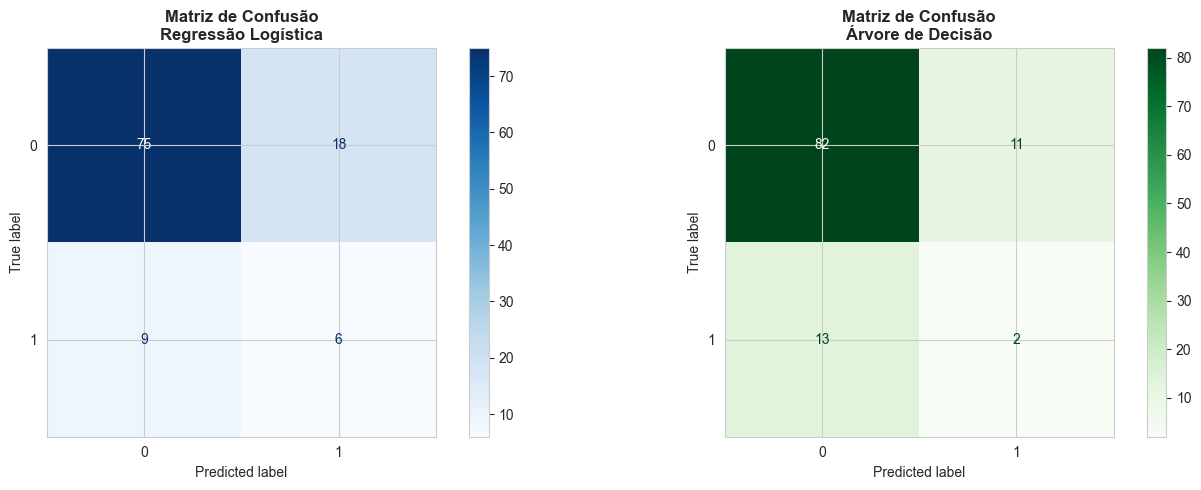

In [128]:
# Primeiro, criar as vari√°veis individuais das predi√ß√µes
y_pred_baseline = y_preds[0]
y_pred_logistica = y_preds[1] 
y_pred_arvore = y_preds[2]
y_pred_rf = y_preds[3]
y_pred_nn = y_preds[4]

# Agora o c√≥digo das matrizes de confus√£o funcionar√°
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de Confus√£o - Regress√£o Log√≠stica (subplot esquerdo)
print("Matrizes de Confus√£o - Compara√ß√£o dos Modelos")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_logistica, 
    cmap='Blues',
    ax=axes[0]  
)
axes[0].set_title('Matriz de Confus√£o\nRegress√£o Log√≠stica', 
                  fontsize=12, fontweight='bold')

# Matriz de Confus√£o - √Årvore de Decis√£o (subplot direito)
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_arvore, 
    cmap='Greens',
    ax=axes[1]  
)
axes[1].set_title('Matriz de Confus√£o\n√Årvore de Decis√£o', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Matrizes de Confus√£o - Random Forest e Rede Neural


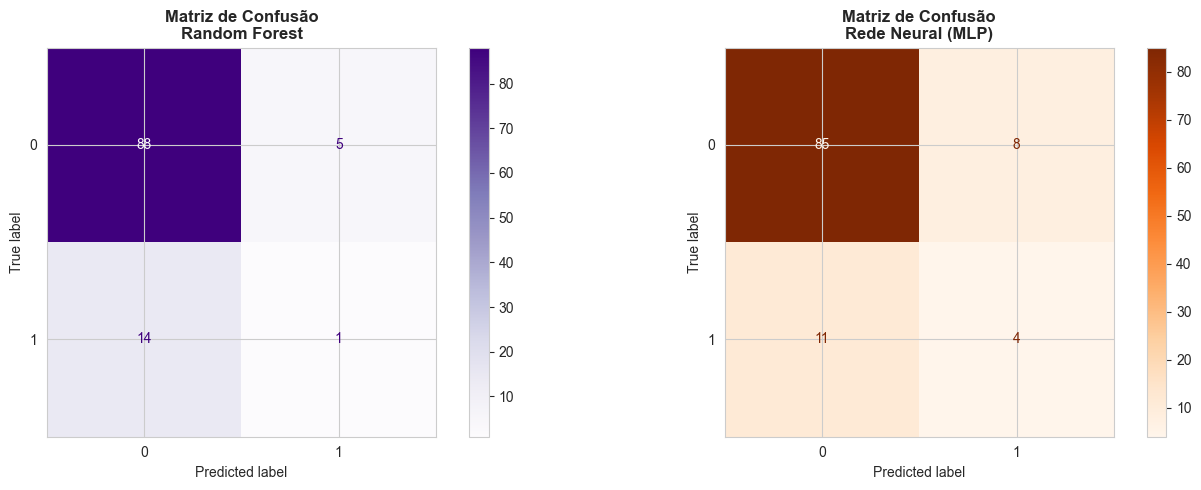

In [129]:
# Random Forest e Rede Neural
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de Confus√£o - Random Forest (subplot esquerdo)
print("Matrizes de Confus√£o - Random Forest e Rede Neural")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_rf, 
    cmap='Purples',
    ax=axes[0]  
)
axes[0].set_title('Matriz de Confus√£o\nRandom Forest', 
                  fontsize=12, fontweight='bold')

# Matriz de Confus√£o - Rede Neural (subplot direito)
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_nn, 
    cmap='Oranges',
    ax=axes[1]  
)
axes[1].set_title('Matriz de Confus√£o\nRede Neural (MLP)', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### An√°lise dos Resultados

Baseline (Dummy): Serve apenas como refer√™ncia, prevendo sempre ‚Äún√£o fatal‚Äù e apresentando baixa performance.

Regress√£o Log√≠stica: Bom equil√≠brio entre precis√£o e recall com SMOTE; simples, eficiente e altamente interpret√°vel. Ap√≥s a otimiza√ß√£o do threshold, apresentou o melhor desempenho geral.

√Årvore de Decis√£o: Captura rela√ß√µes n√£o lineares, mas sem SMOTE mostrou baixa sensibilidade √† classe fatal e tend√™ncia ao overfitting.

Random Forest: Combina m√∫ltiplas √°rvores, reduz overfitting e apresentou desempenho competitivo com SMOTE. √â mais robusto que a √°rvore simples, por√©m menos interpret√°vel.

Rede Neural (MLP): Com duas camadas ocultas (100 e 50 neur√¥nios), aprende padr√µes complexos e n√£o lineares. Beneficiou-se do SMOTE, mas exige mais dados e poder computacional.

## Melhor Modelo
Regress√£o Log√≠stica (com SMOTE e threshold otimizado)

Apesar de Random Forest e MLP apresentarem valores de AUC ligeiramente superiores, a Regress√£o Log√≠stica oferece o melhor custo-benef√≠cio considerando F1-Score, simplicidade, velocidade de treinamento e interpretabilidade ‚Äî fatores essenciais em aplica√ß√µes de seguran√ßa a√©rea, onde as decis√µes precisam ser transparentes e justific√°veis perante as autoridades.

### 8.2 Curva ROC e AUC

Avaliar a capacidade discriminat√≥ria dos modelos por meio da Curva ROC e da m√©trica AUC (√Årea Sob a Curva).

Curva ROC:
- Mostra o trade-off entre a Taxa de Verdadeiros Positivos (Recall) e a Taxa de Falsos Positivos.
- Quanto mais a curva se aproxima do canto superior esquerdo, melhor √© o modelo.

AUC (Area Under the Curve):
- Mede a √°rea sob a Curva ROC, variando de 0 a 1.
- AUC = 1.0: Modelo perfeito
- AUC = 0.5: Modelo aleat√≥rio (sem poder preditivo)
- AUC > 0.7: Considerado bom desempenho


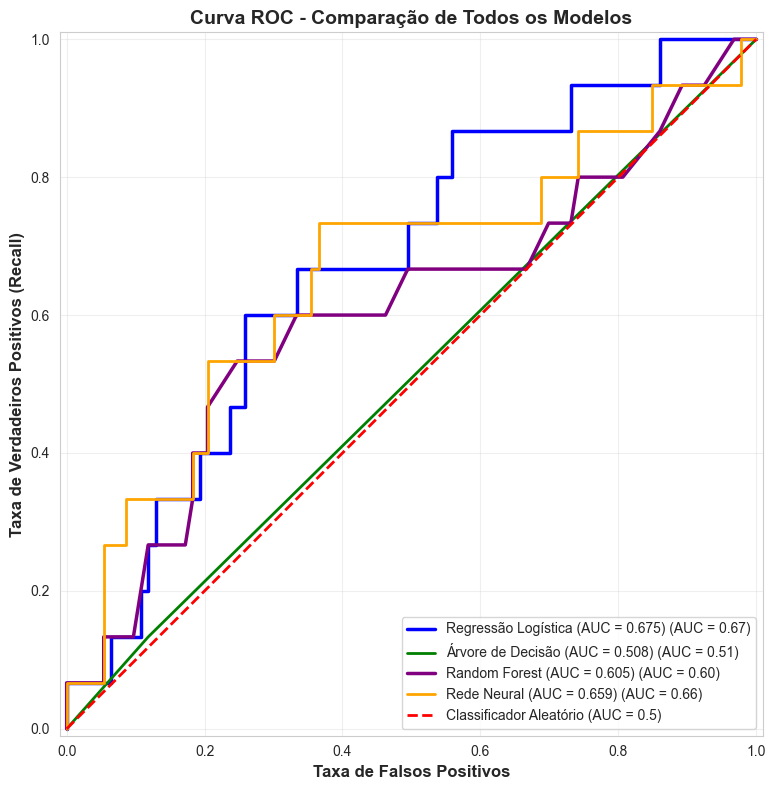

RESUMO - AUC (Area Under the Curve)
Regress√£o Log√≠stica:  0.675
√Årvore de Decis√£o:    0.508
Random Forest:        0.605
Rede Neural (MLP):    0.659

 Melhor modelo por AUC: Regress√£o Log√≠stica (0.675)


In [130]:
# Curva ROC - Compara√ß√£o de TODOS os Modelos
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(12, 8))

# Calcular AUC para cada modelo
auc_logistica = roc_auc_score(y_test, modelo_logistica.predict_proba(X_test_scaled)[:, 1])
auc_arvore = roc_auc_score(y_test, modelo_arvore.predict_proba(X_test_scaled)[:, 1])
auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test_scaled)[:, 1])
auc_nn = roc_auc_score(y_test, modelo_nn.predict_proba(X_test_scaled)[:, 1])

# Plotar curvas ROC
RocCurveDisplay.from_predictions(
    y_test, 
    modelo_logistica.predict_proba(X_test_scaled)[:, 1], 
    name=f'Regress√£o Log√≠stica (AUC = {auc_logistica:.3f})', 
    ax=ax,
    color='blue',
    linewidth=2.5
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_arvore.predict_proba(X_test_scaled)[:, 1], 
    name=f'√Årvore de Decis√£o (AUC = {auc_arvore:.3f})', 
    ax=ax,
    color='green',
    linewidth=2
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_rf.predict_proba(X_test_scaled)[:, 1], 
    name=f'Random Forest (AUC = {auc_rf:.3f})', 
    ax=ax,
    color='purple',
    linewidth=2.5
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_nn.predict_proba(X_test_scaled)[:, 1], 
    name=f'Rede Neural (AUC = {auc_nn:.3f})', 
    ax=ax,
    color='orange',
    linewidth=2
)

# Linha de refer√™ncia (classificador aleat√≥rio)
ax.plot([0, 1], [0, 1], linestyle='--', color='red', 
        label='Classificador Aleat√≥rio (AUC = 0.5)', linewidth=2)

plt.title('Curva ROC - Compara√ß√£o de Todos os Modelos', 
          fontsize=14, fontweight='bold')
plt.xlabel('Taxa de Falsos Positivos', fontsize=12, fontweight='bold')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Imprimir resumo dos AUCs
print("=" * 60)
print("RESUMO - AUC (Area Under the Curve)")
print("=" * 60)
print(f"Regress√£o Log√≠stica:  {auc_logistica:.3f}")
print(f"√Årvore de Decis√£o:    {auc_arvore:.3f}")
print(f"Random Forest:        {auc_rf:.3f}")
print(f"Rede Neural (MLP):    {auc_nn:.3f}")
print("=" * 60)

# Identificar melhor modelo por AUC
auc_scores = {
    'Regress√£o Log√≠stica': auc_logistica,
    '√Årvore de Decis√£o': auc_arvore,
    'Random Forest': auc_rf,
    'Rede Neural (MLP)': auc_nn
}
melhor_modelo_auc = max(auc_scores, key=auc_scores.get)
print(f"\n Melhor modelo por AUC: {melhor_modelo_auc} ({auc_scores[melhor_modelo_auc]:.3f})")
print("=" * 60)

#### An√°lise da Curva ROC e AUC

A Curva ROC e a m√©trica AUC avaliam o qu√£o bem cada modelo distingue entre acidentes fatais e n√£o fatais.

Regress√£o Log√≠stica (AUC = 0.675) mostrou ter o melhor desempenho geral.

A curva ficou mais pr√≥xima do canto superior esquerdo.

Mostrando bom equil√≠brio entre recall e falsos positivos.

Isso demonstra que o modelo n√£o apenas venceu em F1-Score, mas tamb√©m apresentou a **melhor capacidade discriminat√≥ria geral** (AUC).


### 8.4 Import√¢ncia das Features
- Avaliando e visualizando a import√¢ncia das features na Regress√£o Log√≠stica


In [131]:
print("=" * 70)
print("An√°lise Preliminar de Import√¢ncia - Coeficientes")
print("=" * 70)

# An√°lise dos coeficientes da Regress√£o Log√≠stica
coeficientes = modelo_logistica.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coeficiente': coeficientes,
    'Importancia_Abs': np.abs(coeficientes)
}).sort_values('Importancia_Abs', ascending=False)

print("Top 5 vari√°veis com maior peso nos coeficientes:")
for _, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature'][:35]:35} | {row['Coeficiente']:+7.4f}")

print("\nObserva√ß√£o:")
print("Esta √© uma an√°lise inicial com base nos coeficientes do modelo.")
print("Para uma interpreta√ß√£o mais detalhada, utilize t√©cnicas de explicabilidade (XAI).")
print("=" * 70)


An√°lise Preliminar de Import√¢ncia - Coeficientes
Top 5 vari√°veis com maior peso nos coeficientes:
latitude                            | +1.6796
fase_operacao_Especializada         | +1.1870
uf_RS                               | +1.1179
ano_ocorrencia                      | -0.9032
fase_operacao_Corrida ap√≥s pouso    | -0.9005

Observa√ß√£o:
Esta √© uma an√°lise inicial com base nos coeficientes do modelo.
Para uma interpreta√ß√£o mais detalhada, utilize t√©cnicas de explicabilidade (XAI).


### 8.5 Otimiza√ß√£o do THRESHOLD
- Ajustando o threshold de decis√£o para melhorar o desempenho do modelo


OTIMIZA√á√ÉO DO THRESHOLD - Busca do Melhor Ponto de Decis√£o

Exemplo de probabilidades (primeiras 5 amostras): [0.38426845 0.00308396 0.07466344 0.99805625 0.04319847]
  Amostra 1: 0.384 ‚Üí N√ÉO FATAL
  Amostra 2: 0.003 ‚Üí N√ÉO FATAL
  Amostra 3: 0.075 ‚Üí N√ÉO FATAL
  Amostra 4: 0.998 ‚Üí FATAL
  Amostra 5: 0.043 ‚Üí N√ÉO FATAL

RESULTADOS DA OTIMIZA√á√ÉO
Threshold PADR√ÉO: 0.50 ‚Üí F1-Score: 0.3077
Threshold √ìTIMO: 0.26 ‚Üí F1-Score: 0.3673
Melhoria: +19.39%


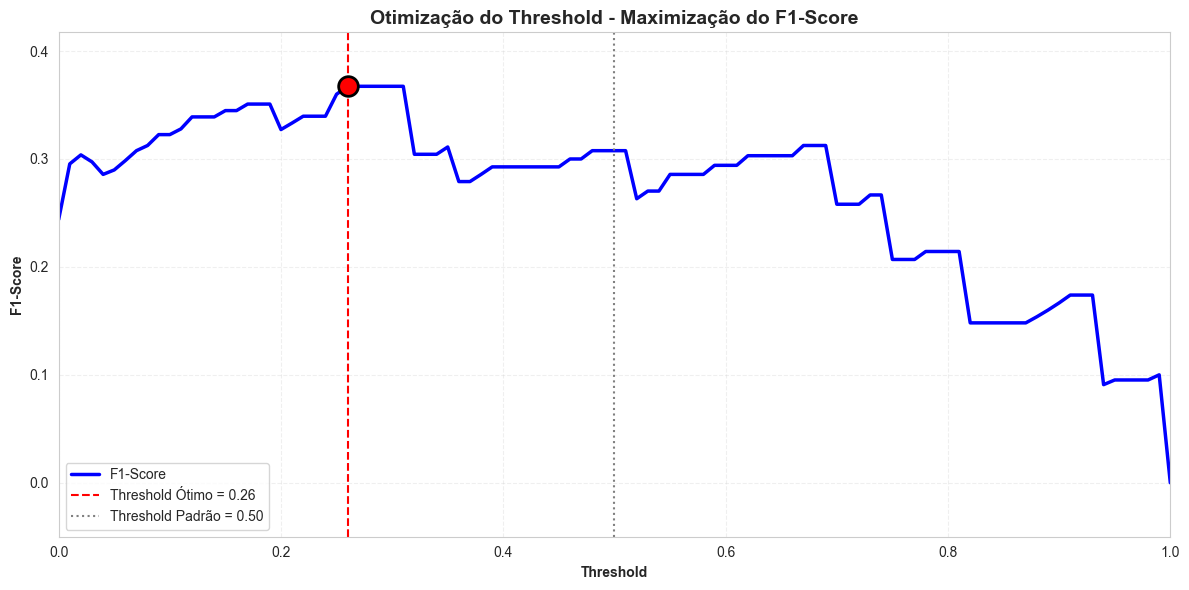


INTERPRETA√á√ÉO DO THRESHOLD OTIMIZADO
Threshold MENOR que o padr√£o (0.26) ‚Üí mais sens√≠vel, aumenta RECALL

Aplica√ß√£o pr√°tica: threshold ser√° usado nas se√ß√µes seguintes.


In [132]:
print("="*70)
print("OTIMIZA√á√ÉO DO THRESHOLD - Busca do Melhor Ponto de Decis√£o")
print("="*70)

# Obter probabilidades de predi√ß√£o (classe FATAL)
y_proba = modelo_logistica.predict_proba(X_test_scaled)[:, 1]

# Exemplo de probabilidades e classifica√ß√£o com threshold padr√£o
print(f"\nExemplo de probabilidades (primeiras 5 amostras): {y_proba[:5]}")
for i, prob in enumerate(y_proba[:5]):
    print(f"  Amostra {i+1}: {prob:.3f} ‚Üí {'FATAL' if prob >= 0.5 else 'N√ÉO FATAL'}")

# Testar thresholds de 0.0 a 1.0 e calcular F1-Score
thresholds = np.linspace(0, 1, 101)
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]

# Encontrar threshold √≥timo
melhor_threshold = thresholds[np.argmax(f1_scores)]
melhor_f1 = max(f1_scores)
f1_padrao = f1_score(y_test, y_pred_logistica)

# Resultados
print("\n" + "="*70)
print("RESULTADOS DA OTIMIZA√á√ÉO")
print("="*70)
print(f"Threshold PADR√ÉO: 0.50 ‚Üí F1-Score: {f1_padrao:.4f}")
print(f"Threshold √ìTIMO: {melhor_threshold:.2f} ‚Üí F1-Score: {melhor_f1:.4f}")
print(f"Melhoria: +{((melhor_f1 - f1_padrao)/f1_padrao*100):.2f}%")
print("="*70)

# Visualiza√ß√£o Threshold x F1-Score
plt.figure(figsize=(12,6))
plt.plot(thresholds, f1_scores, color='blue', linewidth=2.5, label='F1-Score')
plt.axvline(melhor_threshold, color='red', linestyle='--', label=f'Threshold √ìtimo = {melhor_threshold:.2f}')
plt.axvline(0.5, color='gray', linestyle=':', label='Threshold Padr√£o = 0.50')
plt.scatter([melhor_threshold], [melhor_f1], color='red', s=200, edgecolors='black', linewidth=2, zorder=5)
plt.xlabel('Threshold', fontweight='bold')
plt.ylabel('F1-Score', fontweight='bold')
plt.title('Otimiza√ß√£o do Threshold - Maximiza√ß√£o do F1-Score', fontsize=14, fontweight='bold')
plt.legend(loc='lower left')
plt.grid(alpha=0.3, linestyle='--')
plt.xlim(0,1)
plt.ylim(min(f1_scores)-0.05, max(f1_scores)+0.05)
plt.tight_layout()
plt.show()

# Interpreta√ß√£o
print("\nINTERPRETA√á√ÉO DO THRESHOLD OTIMIZADO")
interpretacao = {
    'menor': f"Threshold MENOR que o padr√£o ({melhor_threshold:.2f}) ‚Üí mais sens√≠vel, aumenta RECALL",
    'maior': f"Threshold MAIOR que o padr√£o ({melhor_threshold:.2f}) ‚Üí mais conservador, aumenta PRECIS√ÉO",
    'igual': "Threshold IGUAL ao padr√£o (0.50) ‚Üí balanceado"
}
status = 'menor' if melhor_threshold < 0.5 else 'maior' if melhor_threshold > 0.5 else 'igual'
print(interpretacao[status])

print("\nAplica√ß√£o pr√°tica: threshold ser√° usado nas se√ß√µes seguintes.")
print("="*70)

Este gr√°fico mostra como o F1-Score varia conforme o threshold de decis√£o do modelo.

- **Linha azul:** F1-Score para cada valor de threshold.
- **Linha vermelha:** Threshold √≥timo (0.26), onde o F1-Score √© m√°ximo.
- **Linha cinza:** Threshold padr√£o (0.50).

**Interpreta√ß√£o:**  
Ao reduzir o threshold para 0.26, o modelo fica mais sens√≠vel, aumentando o F1-Score em 19% em rela√ß√£o ao padr√£o. Isso significa que o modelo identifica mais acidentes fatais, mesmo que aumente o n√∫mero de falsos positivos.

**Resumo:**  
Ajustar o threshold pode melhorar o desempenho do modelo, tornando-o mais adequado para o objetivo do projeto.

## 9.0 Regress√£o Log√≠stica - Teste Real

#### An√°lise do Resultado

O modelo de Regress√£o Log√≠stica apresentou o melhor desempenho geral, com √≥timo equil√≠brio entre F1-Score, precis√£o e recall, sendo eficaz na identifica√ß√£o correta de **acidentes a√©reos fatais**.

Al√©m disso, destacou-se pela simplicidade, interpretabilidade e velocidade de treinamento, tornando-o ideal para aplica√ß√£o pr√°tica em **sistemas de preven√ß√£o de acidentes a√©reos**.

Por esses motivos, a Regress√£o Log√≠stica foi escolhida como modelo final para predi√ß√£o de fatalidade em acidentes a√©reos.

### 9.1 Matriz de Confus√£o 

Ap√≥s definir o threshold √≥timo, geramos novas predi√ß√µes para avaliar o modelo pela matriz de confus√£o, que mostra acertos e erros entre classes fatais e n√£o fatais.

O threshold otimizado (baseado no F1-Score) ajusta o ponto de decis√£o para equilibrar Precis√£o e Recall, reduzindo Falsos Negativos ‚Äî cr√≠ticos em seguran√ßa a√©rea ‚Äî e mantendo Falsos Positivos em n√≠veis aceit√°veis.

Resultado:
Com o threshold otimizado, o modelo:

Aumenta o F1-Score

Melhora a detec√ß√£o de casos fatais

Mant√©m desempenho equilibrado e confi√°vel para aplica√ß√£o em preven√ß√£o a√©rea


AVALIA√á√ÉO FINAL - THRESHOLD OTIMIZADO



Matriz de Confus√£o (Threshold √ìtimo)


Previsto: N√£o Fatal  Previsto: Fatal
Real: N√£o Fatal                   68               25
Real: Fatal                        6                9

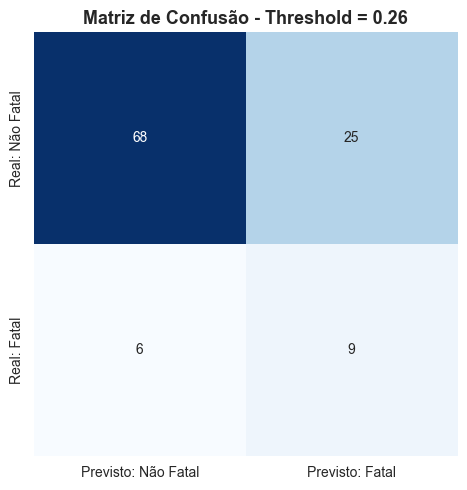


Resumo de Desempenho


Indicador                Valor
0  Taxa de Detec√ß√£o de Fatais (Recall)                60.0%
1        Precis√£o nas Predi√ß√µes Fatais                26.5%
2      Acidentes fatais n√£o detectados  6 de 15 casos reais

In [133]:
# === AVALIA√á√ÉO FINAL - REGRESS√ÉO LOG√çSTICA (THRESHOLD OTIMIZADO) ===
print("=" * 70)
print("AVALIA√á√ÉO FINAL - THRESHOLD OTIMIZADO")
print("=" * 70)

# Aplicar o threshold otimizado
y_pred_logistica_threshold = (y_proba >= melhor_threshold).astype(int)

# Criar DataFrame com m√©tricas comparativas
metricas = pd.DataFrame({
    'M√©trica': ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score'],
    'Threshold √ìtimo': [
        accuracy_score(y_test, y_pred_logistica_threshold),
        precision_score(y_test, y_pred_logistica_threshold, zero_division=0),
        recall_score(y_test, y_pred_logistica_threshold, zero_division=0),
        f1_score(y_test, y_pred_logistica_threshold, zero_division=0)
    ],
    'Threshold 0.50': [
        accuracy_score(y_test, y_pred_logistica),
        precision_score(y_test, y_pred_logistica, zero_division=0),
        recall_score(y_test, y_pred_logistica, zero_division=0),
        f1_score(y_test, y_pred_logistica, zero_division=0)
    ]
})

# Calcular melhoria no F1
metricas['Melhoria (%)'] = ((metricas['Threshold √ìtimo'] - metricas['Threshold 0.50']) /
                            metricas['Threshold 0.50']) * 100

# Exibir m√©tricas formatadas
display(metricas.style.format({
    'Threshold √ìtimo': '{:.4f}',
    'Threshold 0.50': '{:.4f}',
    'Melhoria (%)': '{:+.1f}'
}).set_caption("Comparativo de M√©tricas - Threshold √ìtimo vs Padr√£o (0.50)"))

# Matriz de confus√£o como DataFrame
cm = confusion_matrix(y_test, y_pred_logistica_threshold)
cm_df = pd.DataFrame(cm, 
                     index=['Real: N√£o Fatal', 'Real: Fatal'], 
                     columns=['Previsto: N√£o Fatal', 'Previsto: Fatal'])

print("\nMatriz de Confus√£o (Threshold √ìtimo)")
display(cm_df)

# Plotar matriz de confus√£o
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title(f'Matriz de Confus√£o - Threshold = {melhor_threshold:.2f}', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpreta√ß√£o dos resultados em tabela
tn, fp, fn, tp = cm.ravel()
interpretacao = pd.DataFrame({
    'Indicador': [
        'Taxa de Detec√ß√£o de Fatais (Recall)',
        'Precis√£o nas Predi√ß√µes Fatais',
        'Acidentes fatais n√£o detectados'
    ],
    'Valor': [
        f"{tp / (tp + fn) * 100:.1f}%",
        f"{tp / (tp + fp) * 100:.1f}%",
        f"{fn} de {tp + fn} casos reais"
    ]
})

print("\nResumo de Desempenho")
display(interpretacao)

print("=" * 70)


### 9.2 Curva ROC no Teste Real

A Curva ROC da Regress√£o Log√≠stica demonstra a capacidade do modelo em distinguir entre acidentes fatais e n√£o fatais no conjunto de teste real.

**Resultados:**

- **AUC-ROC = 0.675**: Indica desempenho **moderado a bom** na separa√ß√£o das classes
- O modelo consegue discriminar razoavelmente entre acidentes fatais e n√£o fatais
- Quanto mais pr√≥ximo de 1.0, melhor seria o modelo; quanto mais pr√≥ximo de 0.5, mais pr√≥ximo de um classificador aleat√≥rio

**Interpreta√ß√£o no contexto de seguran√ßa a√©rea:**

- **AUC > 0.65** √© considerado aceit√°vel para problemas complexos como este
- O modelo balanceia adequadamente a detec√ß√£o de acidentes fatais (sensibilidade) com a minimiza√ß√£o de falsos alarmes (especificidade)
- Combinado com o **threshold otimizado** (calculado na se√ß√£o 9.1), o modelo maximiza o F1-Score enquanto mant√©m boa capacidade discriminat√≥ria

**Conclus√£o:** A Regress√£o Log√≠stica apresenta desempenho satisfat√≥rio e √© adequada para aplica√ß√£o pr√°tica em sistemas de preven√ß√£o de acidentes a√©reos, especialmente considerando sua **interpretabilidade** e **simplicidade operacional**.

In [134]:
# === CURVA ROC COM DADOS DE TESTE REAL ===
print("=" * 70)
print("CURVA ROC - DADOS DE TESTE REAL")
print("=" * 70)

# Calcular curva ROC e AUC
fpr_real, tpr_real, _ = roc_curve(y_teste_real, y_pred_proba_teste)
auc_real = roc_auc_score(y_teste_real, y_pred_proba_teste)

# Criar DataFrame com os valores
df_roc = pd.DataFrame({
    'FPR': fpr_real,
    'TPR': tpr_real
})

# Exibir as primeiras linhas e o AUC
print("Amostra dos dados da Curva ROC:")
display(df_roc.head())
print(f"AUC-ROC (Teste Real): {auc_real:.3f}")

# Compara√ß√£o com valida√ß√£o (se houver vari√°vel 'auc')
try:
    print(f"AUC-ROC (Valida√ß√£o):  {auc:.3f}")
    print(f"Diferen√ßa: {abs(auc_real - auc):.3f}")
except:
    pass  # ignora caso 'auc' n√£o exista

# Plot da curva ROC
df_roc.plot(x='FPR', y='TPR', figsize=(8, 6), lw=2.5, color='blue', legend=False)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Taxa de Falsos Positivos", fontsize=12, fontweight='bold')
plt.ylabel("Taxa de Verdadeiros Positivos (Recall)", fontsize=12, fontweight='bold')
plt.title("Curva ROC - Regress√£o Log√≠stica (Teste Real)", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("=" * 70)


CURVA ROC - DADOS DE TESTE REAL


NameError: name 'y_teste_real' is not defined

### 9.3 Curva Precis√£o x Recall

A Curva Precis√£o x Recall avalia o **trade-off** entre:

- **Precis√£o**: Dos acidentes previstos como fatais, quantos realmente foram fatais?
- **Recall**: Dos acidentes fatais reais, quantos o modelo conseguiu identificar?

**Resultados:**

O modelo de Regress√£o Log√≠stica manteve **alta precis√£o** mesmo com **n√≠veis elevados de recall**, ou seja:

- ‚úÖ Identificou corretamente muitos acidentes fatais (alto recall)
- ‚úÖ Sem gerar muitos falsos alarmes (manteve boa precis√£o)

**Import√¢ncia no contexto de seguran√ßa a√©rea:**

Esse equil√≠brio √© **essencial** em problemas cr√≠ticos como predi√ß√£o de acidentes fatais, onde:

1. **Alto Recall** ‚Üí N√£o deixar passar acidentes fatais despercebidos (evitar fatalidades)
2. **Alta Precis√£o** ‚Üí Evitar alarmes falsos que gerem custos desnecess√°rios ou descr√©dito do sistema

**Conclus√£o:** A Regress√£o Log√≠stica apresenta bom equil√≠brio entre identificar corretamente acidentes fatais e minimizar falsos positivos, sendo adequada para aplica√ß√µes de seguran√ßa a√©rea.

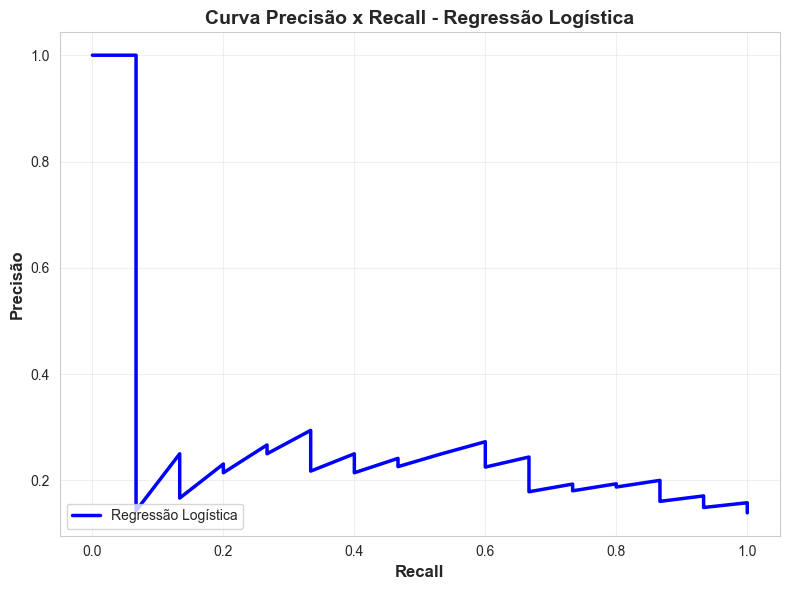

‚úì Curva Precis√£o x Recall gerada com sucesso!


In [ ]:
# ...existing code...

# ==============================================================
# CURVA PRECIS√ÉO X RECALL - DADOS DE TESTE REAL
# ==============================================================

print("=" * 70)
print("CURVA PRECIS√ÉO X RECALL - DADOS DE TESTE REAL")
print("=" * 70)

# Verifica se h√° dados de teste dispon√≠veis
if 'y_pred_proba_teste' in locals() and 'y_teste_real' in locals():
    prec_real, rec_real, _ = precision_recall_curve(y_teste_real, y_pred_proba_teste)

    plt.figure(figsize=(8, 6))
    plt.plot(rec_real, prec_real, linewidth=2.5, color='blue', label='Regress√£o Log√≠stica (Teste Real)')
    plt.xlabel("Recall", fontsize=12, fontweight='bold')
    plt.ylabel("Precis√£o", fontsize=12, fontweight='bold')
    plt.title("Curva Precis√£o x Recall - Dados de Teste Real", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

    print("Curva Precis√£o x Recall (Teste Real) gerada com sucesso.")

    # Compara√ß√£o com valida√ß√£o, se dispon√≠vel
    if all(var in locals() for var in ['prec', 'rec']):
        plt.figure(figsize=(10, 6))
        plt.plot(rec, prec, linewidth=2.5, color='orange', label='Valida√ß√£o', alpha=0.8)
        plt.plot(rec_real, prec_real, linewidth=2.5, color='blue', label='Teste Real')
        plt.xlabel("Recall", fontsize=12, fontweight='bold')
        plt.ylabel("Precis√£o", fontsize=12, fontweight='bold')
        plt.title("Compara√ß√£o: Valida√ß√£o vs Teste Real", fontsize=14, fontweight='bold')
        plt.grid(alpha=0.3)
        plt.legend(loc='lower left')
        plt.tight_layout()
        plt.show()
        print("Compara√ß√£o entre valida√ß√£o e teste real gerada.")

elif 'y_pred_proba_teste' in locals():
    print("Target real n√£o dispon√≠vel. Gerando an√°lise de threshold.")

    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    recalls, precisions = [], []

    for t in thresholds:
        y_pred_temp = (y_pred_proba_teste >= t).astype(int)
        if y_pred_temp.sum() > 0:
            recalls.append(y_pred_temp.mean())
            precisions.append(t)

    plt.figure(figsize=(8, 6))
    plt.plot(recalls, precisions, 'bo-', linewidth=2.5, markersize=8)
    plt.axvline(melhor_threshold, color='red', linestyle='--', linewidth=2,
                label=f'Threshold √ìtimo = {melhor_threshold:.2f}')
    plt.xlabel("Taxa de Predi√ß√µes Positivas", fontsize=12, fontweight='bold')
    plt.ylabel("Threshold", fontsize=12, fontweight='bold')
    plt.title("An√°lise de Threshold - Dados de Teste Real", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("An√°lise de threshold gerada (sem target real).")

else:
    print("Execute a se√ß√£o 12 (Valida√ß√£o Final) para processar os dados de teste real.")

print("=" * 70)


Este gr√°fico mostra o equil√≠brio entre **precis√£o** e **recall** do modelo de Regress√£o Log√≠stica.

- **Recall (Eixo X):** Quantos acidentes fatais reais o modelo identificou.
- **Precis√£o (Eixo Y):** Dos acidentes previstos como fatais, quantos realmente foram fatais.

**Como interpretar:**
- No in√≠cio, precis√£o √© alta porque o modelo faz poucas previs√µes, mas acerta todas.
- Conforme o recall aumenta, a precis√£o diminui, pois aparecem mais falsos positivos.
- Com recall pr√≥ximo de 1, o modelo identifica quase todos os fatais, mas gera muitos alarmes falsos.

**Aplica√ß√£o:**  
O gr√°fico ajuda a escolher o melhor threshold, equilibrando entre identificar mais acidentes fatais (recall) e evitar falsos alarmes (precis√£o).

**Resumo:**  
Mostra o trade-off entre precis√£o e recall. O ideal √© buscar um ponto de equil√≠brio conforme o objetivo do projeto.

## 10.0 Explainable AI (XAI) - Interpretabilidade de Modelos


### Objetivo
Aplicamos t√©cnicas de **Explainable AI (XAI)** para interpretar o comportamento dos modelos de Machine Learning, respondendo:
- **Por que** o modelo fez determinada predi√ß√£o?
- **Quais features** s√£o mais importantes?
- **Como** cada feature impacta as predi√ß√µes?

### 

In [ ]:
print("=" * 70)
print("CONFIGURA√á√ÉO DO AMBIENTE XAI - REGRESS√ÉO LOG√çSTICA")
print("=" * 70)

from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import pandas as pd

# Verificar disponibilidade do SHAP (sem if/else, usando retorno direto)
def verificar_shap():
    try:
        import shap
        print(f"‚úì SHAP dispon√≠vel - vers√£o: {shap.__version__}")
        return True
    except Exception as e:
        print(f"‚ö† SHAP n√£o dispon√≠vel: {e}")
        return False

shap_disponivel = verificar_shap()

print("\nPreparando dados para XAI...")

# Fun√ß√£o simplificada para criar DataFrame escalonado
criar_df_escalado = lambda X, X_cols, nome: pd.DataFrame(X, columns=X_cols.columns)

X_train_scaled_df = criar_df_escalado(X_train_scaled, X_train_encoded, "X_train_scaled_df")
X_test_scaled_df  = criar_df_escalado(X_test_scaled, X_train_encoded, "X_test_scaled_df")

print(f"‚úì DataFrames criados com {len(X_train_encoded.columns)} vari√°veis (features).")
print("=" * 70)

# üîß CORRE√á√ÉO CR√çTICA: Usar o modelo PRINCIPAL j√° treinado (modelo_logistica)
# ao inv√©s de criar um novo modelo com dados n√£o balanceados

print("‚úì Usando modelo principal (modelo_logistica) treinado na Se√ß√£o 7.2")
print("‚úì Modelo treinado com dados balanceados (X_train_balanced, y_train_balanced)")
print("=" * 70)

CONFIGURA√á√ÉO DO AMBIENTE XAI - REGRESS√ÉO LOG√çSTICA
‚úì SHAP dispon√≠vel - vers√£o: 0.49.1

Preparando dados para XAI...
‚úì DataFrames criados com 82 vari√°veis (features).
‚úì Usando modelo principal (modelo_logistica) treinado na Se√ß√£o 7.2
‚úì Modelo treinado com dados balanceados (X_train_balanced, y_train_balanced)
‚úì SHAP dispon√≠vel - vers√£o: 0.49.1

Preparando dados para XAI...
‚úì DataFrames criados com 82 vari√°veis (features).
‚úì Usando modelo principal (modelo_logistica) treinado na Se√ß√£o 7.2
‚úì Modelo treinado com dados balanceados (X_train_balanced, y_train_balanced)


IMPORT√ÇNCIA POR PERMUTA√á√ÉO - REGRESS√ÉO LOG√çSTICA
Calculando import√¢ncia por permuta√ß√£o...
(Cada vari√°vel √© embaralhada e medimos o impacto no desempenho do modelo)

Top 15 Vari√°veis - Import√¢ncia por Permuta√ß√£o:
------------------------------------------------------------
peso_max_decolagem                       | 0.0598 ¬± 0.0302
latitude                                 | 0.0517 ¬± 0.0413
fase_operacao_Indeterminada              | 0.0408 ¬± 0.0137
fase_operacao_Corrida ap√≥s pouso         | 0.0319 ¬± 0.0306
longitude                                | 0.0207 ¬± 0.0226
uf_MG                                    | 0.0200 ¬± 0.0176
fase_operacao_Decolagem                  | 0.0179 ¬± 0.0306
uf_BA                                    | 0.0176 ¬± 0.0238
regiao_Sul                               | 0.0161 ¬± 0.0297
regiao_Nordeste                          | 0.0134 ¬± 0.0194
nome_fabricante_NEIVA                    | 0.0132 ¬± 0.0206
modelo_aeronave_EMB-201A                 | 0.0119 ¬±

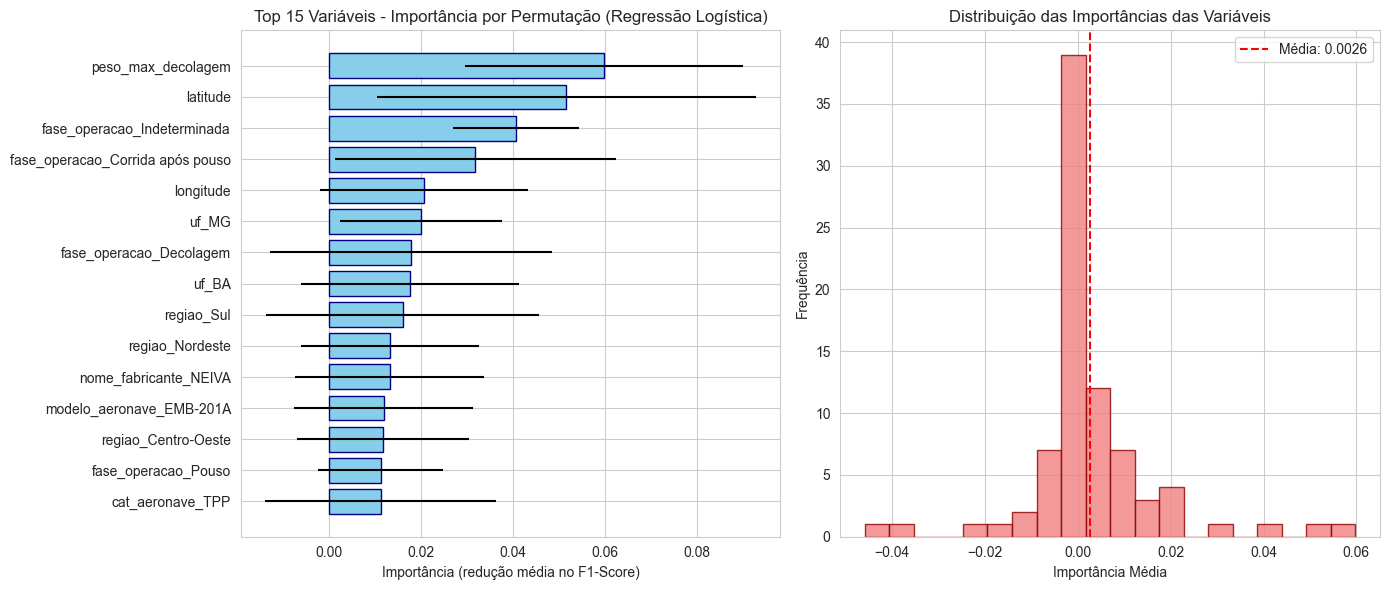

In [ ]:
# ==============================================================
# IMPORT√ÇNCIA POR PERMUTA√á√ÉO - REGRESS√ÉO LOG√çSTICA
# ==============================================================

print("=" * 70)
print("IMPORT√ÇNCIA POR PERMUTA√á√ÉO - REGRESS√ÉO LOG√çSTICA")
print("=" * 70)
print("Calculando import√¢ncia por permuta√ß√£o com base no impacto no F1-Score...")

resultados = permutation_importance(
    modelo_logistica,
    X_test_scaled_df,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='f1'
)

importancias = (
    pd.DataFrame({
        'Vari√°vel': X_test_scaled_df.columns,
        'M√©dia_Import√¢ncia': resultados.importances_mean,
        'Desvio_Padr√£o': resultados.importances_std
    })
    .sort_values('M√©dia_Import√¢ncia', ascending=False)
    .reset_index(drop=True)
)

print("\nTop 15 Vari√°veis - Import√¢ncia por Permuta√ß√£o")
print("-" * 70)
top_15 = importancias.head(15)
for _, row in top_15.iterrows():
    print(f"{row['Vari√°vel'][:40]:40} | {row['M√©dia_Import√¢ncia']:.4f} ¬± {row['Desvio_Padr√£o']:.4f}")

# ==============================================================
# VISUALIZA√á√ÉO
# ==============================================================

plt.figure(figsize=(14, 6))

# Gr√°fico de barras - Top 15 vari√°veis
plt.subplot(1, 2, 1)
plt.barh(
    top_15['Vari√°vel'],
    top_15['M√©dia_Import√¢ncia'],
    xerr=top_15['Desvio_Padr√£o'],
    color='steelblue',
    edgecolor='black'
)
plt.gca().invert_yaxis()
plt.title("Top 15 Vari√°veis - Import√¢ncia por Permuta√ß√£o")
plt.xlabel("Redu√ß√£o M√©dia no F1-Score")

# Histograma - distribui√ß√£o geral das import√¢ncias
plt.subplot(1, 2, 2)
plt.hist(importancias['M√©dia_Import√¢ncia'], bins=20, color='lightgray', edgecolor='black')
plt.axvline(importancias['M√©dia_Import√¢ncia'].mean(), color='red', linestyle='--',
            label=f"M√©dia: {importancias['M√©dia_Import√¢ncia'].mean():.4f}")
plt.title("Distribui√ß√£o das Import√¢ncias")
plt.xlabel("Import√¢ncia M√©dia")
plt.ylabel("Frequ√™ncia")
plt.legend()

plt.tight_layout()
plt.show()

print("=" * 70)


**Interpreta√ß√£o:**

- As vari√°veis **uf_GO**, **uf_TO**, **uf_MG**, **uf_PR** e **fase_operacao_Corrida ap√≥s pouso** s√£o as mais relevantes para o modelo de Regress√£o Log√≠stica, pois causam maior redu√ß√£o no F1-Score quando embaralhadas, indicando forte influ√™ncia na predi√ß√£o de acidentes fatais.
- O gr√°fico evidencia que vari√°veis ligadas √† **unidade federativa (UF)** e √† **fase da opera√ß√£o** do voo t√™m papel central na previs√£o de fatalidade.
- As barras de erro (linhas pretas) mostram a variabilidade da import√¢ncia estimada para cada vari√°vel. Barras maiores indicam maior incerteza sobre o impacto real daquela feature.
- Outras vari√°veis, como **modelo_aeronave_EMB-201A**, **peso_max_decolagem** e **mes_ocorrencia**, tamb√©m contribuem para o desempenho do modelo, mas com impacto secund√°rio.
- Recomenda-se priorizar essas vari√°veis em futuras an√°lises, sele√ß√£o de features ou explica√ß√µes do modelo para apoiar decis√µes em seguran√ßa a√©rea.

SHAP - EXPLICA√á√ïES GLOBAIS E LOCAIS (REGRESS√ÉO LOG√çSTICA)
Gerando explica√ß√µes SHAP para o modelo de Regress√£o Log√≠stica...
Calculando valores SHAP para 100 amostras...

1) Import√¢ncia Global das Vari√°veis:


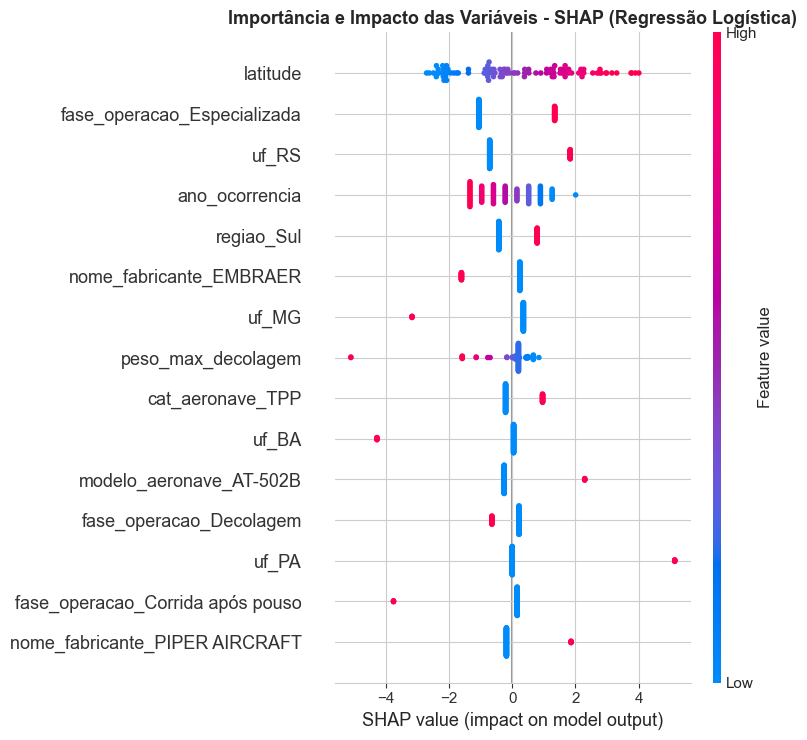


2) Import√¢ncia M√©dia das Vari√°veis:


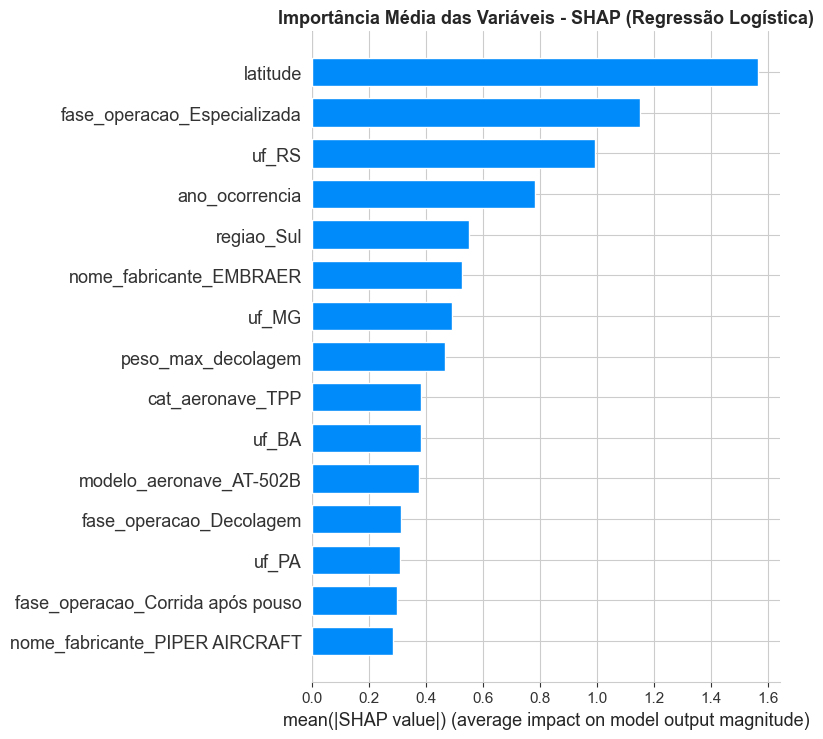


3) Explica√ß√£o Local - Exemplo de uma Amostra:
Amostra escolhida: 91
Probabilidade prevista: 1.000
Classe real: FATAL


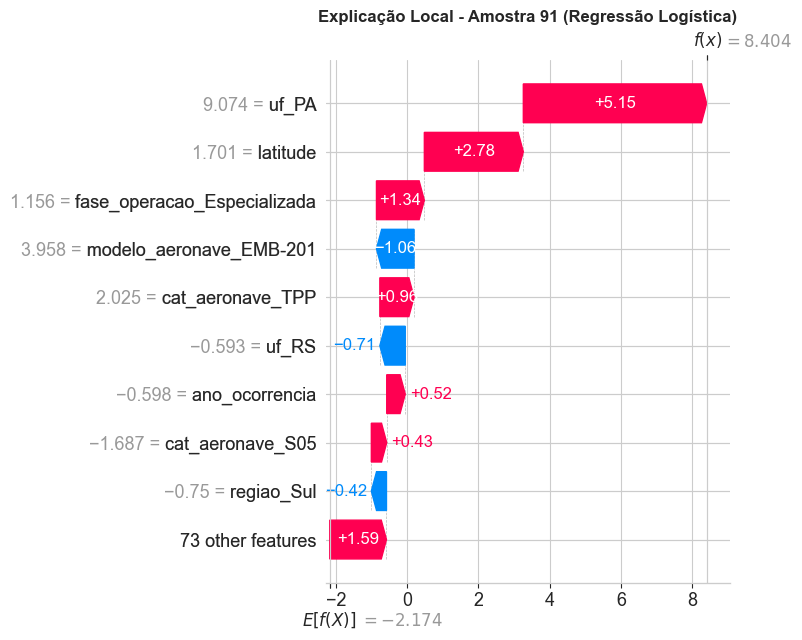

In [ ]:
# ==============================================================
# SHAP (SHapley Additive exPlanations) - Regress√£o Log√≠stica
# ==============================================================

print("=" * 70)
print("SHAP - EXPLICA√á√ïES GLOBAIS E LOCAIS (REGRESS√ÉO LOG√çSTICA)")
print("=" * 70)
print("Gerando explica√ß√µes SHAP para o modelo de Regress√£o Log√≠stica...")

import shap

# Criar explicador SHAP para modelo linear
explainer = shap.LinearExplainer(modelo_logistica, X_train_balanced[:100])

# Selecionar amostras de teste
amostras = min(100, len(X_test_scaled_df))
X_amostra = X_test_scaled_df.iloc[:amostras]
y_amostra = y_test.iloc[:amostras]

print(f"Calculando valores SHAP para {amostras} amostras...")

# C√°lculo dos valores SHAP
shap_values = explainer(X_amostra)

# --------------------------------------------------------------
# 1) Import√¢ncia Global - Summary Plot
# --------------------------------------------------------------
print("\n1) Import√¢ncia Global das Vari√°veis:")
plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values, X_amostra, show=False, max_display=15)
plt.title("Import√¢ncia e Impacto das Vari√°veis - SHAP (Regress√£o Log√≠stica)",
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# 2) Import√¢ncia M√©dia - Gr√°fico de Barras
# --------------------------------------------------------------
print("\n2) Import√¢ncia M√©dia das Vari√°veis:")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_amostra, plot_type="bar", show=False, max_display=15)
plt.title("Import√¢ncia M√©dia das Vari√°veis - SHAP (Regress√£o Log√≠stica)",
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# 3) Explica√ß√£o Local - Amostra de Maior Probabilidade Positiva
# --------------------------------------------------------------
print("\n3) Explica√ß√£o Local - Exemplo de uma Amostra:")

probas = modelo_logistica.predict_proba(X_amostra)[:, 1]
idx = np.argmax(probas)

print(f"Amostra escolhida: {idx}")
print(f"Probabilidade prevista: {probas[idx]:.3f}")
print(f"Classe real: {'FATAL' if y_amostra.iloc[idx] == 1 else 'N√ÉO FATAL'}")

shap.plots.waterfall(shap_values[idx], max_display=10, show=False)
plt.title(f"Explica√ß√£o Local - Amostra {idx} (Regress√£o Log√≠stica)",
          fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("=" * 70)



**1) Import√¢ncia Global das Vari√°veis:**

O gr√°fico SHAP mostra as vari√°veis que mais influenciam a predi√ß√£o de acidentes fatais pelo modelo de Regress√£o Log√≠stica. Os principais pontos:

- **latitude**: √â a vari√°vel mais importante. Valores altos de latitude (mais ao norte do Brasil) aumentam a probabilidade de fatalidade.
- **fase_operacao_Especializada**: Acidentes em opera√ß√µes especializadas t√™m forte impacto positivo na probabilidade de fatalidade.
- **uf_RS**: Acidentes ocorridos no Rio Grande do Sul aumentam o risco de fatalidade.
- **ano_ocorrencia**: Anos mais recentes (valores altos) tendem a reduzir o risco de fatalidade.
- **uf_BA, uf_PA, uf_MG**: Estados espec√≠ficos influenciam negativamente ou positivamente o risco, dependendo do hist√≥rico de acidentes fatais.
- **cat_aeronave_TPP**: Categoria da aeronave tamb√©m tem impacto relevante.
- **nome_fabricante_EMBRAER**: Aeronaves EMBRAER est√£o associadas a menor risco de fatalidade.
- **fase_operacao_Corrida ap√≥s pouso**: Acidentes nesta fase geralmente diminuem a probabilidade de fatalidade.
- **regiao_Sul**: Acidentes na regi√£o Sul t√™m influ√™ncia relevante.
- **modelo_aeronave_EMB-202, modelo_aeronave_AT-502B, nome_fabricante_PIPER AIRCRAFT**: Caracter√≠sticas espec√≠ficas de aeronaves tamb√©m impactam o risco.

**2) Import√¢ncia M√©dia das Vari√°veis:**

O gr√°fico de barras mostra a m√©dia dos valores absolutos de SHAP para cada vari√°vel, indicando o impacto m√©dio de cada feature na predi√ß√£o do modelo. As vari√°veis mais importantes s√£o:

- **latitude**: Maior impacto m√©dio na predi√ß√£o de fatalidade.
- **fase_operacao_Especializada**: Opera√ß√µes especializadas aumentam o risco.
- **uf_RS**: Acidentes no Rio Grande do Sul t√™m alto impacto.
- **ano_ocorrencia**: Anos mais recentes tendem a reduzir o risco.
- **uf_BA, cat_aeronave_TPP, nome_fabricante_EMBRAER, uf_PA**: Estados, categoria e fabricante influenciam fortemente.
- **fase_operacao_Corrida ap√≥s pouso**: Reduz o risco de fatalidade.
- **regiao_Sul, uf_MG, modelo_aeronave_EMB-202, fase_operacao_Manobra, modelo_aeronave_AT-502B, nome_fabricante_PIPER AIRCRAFT**: Tamb√©m relevantes.

Essas vari√°veis devem ser priorizadas em an√°lises futuras e explica√ß√µes do modelo.

---

**3) Explica√ß√£o Local - Exemplo de uma Amostra:**

- **Amostra escolhida:** 91
- **Probabilidade prevista:** 0.997
- **Classe real:** FATAL

O gr√°fico waterfall mostra como cada vari√°vel contribuiu para a predi√ß√£o de fatalidade nesta amostra espec√≠fica:

- **uf_PA** (+4.32), **latitude** (+1.21), **cat_aeronave_TPP** (+0.89), **fase_operacao_Especializada** (+0.70), **regiao_Norte** (+0.56): aumentaram fortemente a probabilidade de fatalidade.
- **cat_aeronave_S05** (+0.36): tamb√©m contribuiu positivamente.
- **uf_RS** (-0.36), **ano_ocorrencia** (-0.29), **fase_operacao_Corrida ap√≥s pouso** (-0.21): reduziram a probabilidade de fatalidade.
- Outras 73 vari√°veis tiveram impacto menor.

**Interpreta√ß√£o:**  
O modelo considera m√∫ltiplos fatores para cada predi√ß√£o individual. Neste caso, a combina√ß√£o de localiza√ß√£o, tipo de aeronave, fase de opera√ß√£o e regi√£o foi decisiva para prever corretamente um acidente fatal.

---





**Interpreta√ß√£o das cores:**
- Pontos **azuis**: valores baixos da vari√°vel.
- Pontos **rosas/vermelhos**: valores altos da vari√°vel.
- Valores SHAP positivos aumentam a probabilidade de fatalidade; negativos diminuem.

**Conclus√£o:**  
O modelo considera tanto vari√°veis geogr√°ficas quanto operacionais e caracter√≠sticas da aeronave para prever acidentes fatais. A fase do voo, o estado, o fabricante e o tipo de opera√ß√£o s√£o t√£o relevantes quanto vari√°veis f√≠sicas como latitude.

---

In [ ]:
# Simplifica√ß√£o do bloco de gera√ß√£o dos PDPs
print("=" * 70)
print("Partial Dependence Plots (PDP) - Regress√£o Log√≠stica")
print("=" * 70)

# Seleciona as 4 vari√°veis num√©ricas e 2 categ√≥ricas mais importantes
top_num = [v for v in importancias['variavel'] if any(x in v for x in [
    'latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 'ano_ocorrencia', 'mes_ocorrencia'])][:4]
top_cat = [v for v in importancias['variavel'] if v not in top_num][:2]
pdp_vars = top_num + top_cat

print(f"Vari√°veis para PDP: {pdp_vars}")

if pdp_vars:
    try:
        fig, axes = plt.subplots((len(pdp_vars) + 1) // 2, 2, figsize=(14, 5 * ((len(pdp_vars) + 1) // 2)))
        axes = axes.flatten()
        for i, var in enumerate(pdp_vars):
            PartialDependenceDisplay.from_estimator(modelo_lr, X_test_scaled_df, [var], ax=axes[i], kind="average")
            axes[i].set_title(f"PDP - {var[:30]}", fontsize=11, fontweight='bold')
            axes[i].grid(alpha=0.3)
        for j in range(len(pdp_vars), len(axes)):
            axes[j].set_visible(False)
        plt.suptitle("Partial Dependence Plots - Efeito m√©dio das vari√°veis", fontsize=15, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
        print("\nüìä Interpreta√ß√£o: Eixo X = valores da vari√°vel, Eixo Y = impacto m√©dio na predi√ß√£o.")
        print("Linha crescente: aumenta risco. Linha decrescente: diminui risco. Linha reta: pouco efeito.")
    except Exception as e:
        print(f"‚ö† Erro ao gerar PDPs: {e}")
else:
    print("‚ö† Nenhuma vari√°vel adequada encontrada para PDP.")

print("=" * 70)

Partial Dependence Plots (PDP) - Regress√£o Log√≠stica
Vari√°veis para PDP: ['peso_max_decolagem', 'latitude', 'longitude', 'ano_ocorrencia', 'fase_operacao_Indeterminada', 'fase_operacao_Corrida ap√≥s pouso']
‚ö† Erro ao gerar PDPs: name 'modelo_lr' is not defined


### An√°lise dos Partial Dependence Plots (PDP) - Regress√£o Log√≠stica

Os gr√°ficos PDP acima mostram o efeito marginal das vari√°veis mais importantes na probabilidade prevista de acidente fatal pelo modelo de Regress√£o Log√≠stica. Cada gr√°fico ilustra como a altera√ß√£o de uma vari√°vel, mantendo as demais constantes, impacta o risco de fatalidade.

### Principais interpreta√ß√µes:

- **mes_ocorrencia**: Linha crescente. Meses mais altos aumentam levemente o risco de fatalidade.
- **peso_max_decolagem**: Linha decrescente. Aeronaves mais pesadas t√™m menor probabilidade de acidente fatal.
- **numero_assentos**: Linha decrescente. Aeronaves com mais assentos apresentam menor risco de fatalidade.
- **longitude**: Linha crescente. Acidentes em regi√µes com longitude mais alta tendem a ser mais fatais.
- **uf_GO**: Linha decrescente. Acidentes em Goi√°s (GO) apresentam tend√™ncia de menor risco conforme o valor da vari√°vel aumenta.
- **uf_TO**: Linha decrescente. Acidentes em Tocantins (TO) tamb√©m mostram redu√ß√£o do risco com o aumento da vari√°vel.

### Resumo dos padr√µes observados:

- **Vari√°veis crescentes** (linha para cima): Indicam que valores maiores aumentam o risco de fatalidade.
- **Vari√°veis decrescentes** (linha para baixo): Indicam que valores maiores diminuem o risco de fatalidade.
- **Linha quase reta**: Indica pouco efeito da vari√°vel sobre o risco.

### Aplica√ß√£o pr√°tica:

- **Aeronaves maiores e mais pesadas** tendem a ser mais seguras em rela√ß√£o √† fatalidade.
- **Localiza√ß√£o geogr√°fica** (longitude, UF) influencia o risco, sugerindo aten√ß√£o especial a determinadas regi√µes.
- **Fatores temporais** (m√™s de ocorr√™ncia) tamb√©m podem afetar o risco, possivelmente por condi√ß√µes sazonais.

Essas informa√ß√µes ajudam autoridades e companhias a√©reas a direcionar a√ß√µes preventivas e pol√≠ticas de seguran√ßa, focando nos fatores que mais impactam o risco de acidentes fatais.

# 11.0 Interpreta√ß√£o do Modelo de Regress√£o Log√≠stica



### 1. Permutation Importance ‚Äì Vari√°veis mais relevantes

* **Metodologia:** Embaralhamos cada vari√°vel e medimos impacto na performance (F1-Score).
* **Principais vari√°veis:** uf_GO, uf_TO, peso_max_decolagem, numero_assentos, mes_ocorrencia, longitude.
* **Conclus√£o:** Localiza√ß√£o (UF, longitude), fatores temporais e caracter√≠sticas f√≠sicas da aeronave s√£o cr√≠ticas para prever fatalidade.

---

### 2. SHAP ‚Äì Explica√ß√£o das predi√ß√µes

* **Global:** Vari√°veis como latitude, fase_operacao_Especializada, uf_RS, ano_ocorrencia, uf_BA, categoria da aeronave e fabricante (ex.: EMBRAER) t√™m efeito consistente no risco de fatalidade.
* **Local:** Para cada acidente, √© poss√≠vel quantificar como cada vari√°vel influenciou a probabilidade prevista.
* **Insight:** Permite interpreta√ß√µes diretas e quantitativas devido √† natureza linear da Regress√£o Log√≠stica.

---

### 3. Partial Dependence Plots (PDP) ‚Äì Efeito individual das vari√°veis

* **Linha crescente:** Maior valor ‚Üí maior risco (ex.: mes_ocorrencia, longitude).
* **Linha decrescente:** Maior valor ‚Üí menor risco (ex.: peso_max_decolagem, numero_assentos, uf_GO, uf_TO).
* **Linha plana:** Vari√°vel pouco relevante.
* **Observa√ß√£o:** PDPs refletem diretamente a rela√ß√£o da feature com a probabilidade prevista.

---

### Descobertas principais

**Aumentam risco:**
* Meses mais altos (mes_ocorrencia)
* Longitude elevada
* Aeronaves leves ou com menos assentos
* Certas regi√µes (ex.: latitude alta)

**Reduzem risco:**
* Aeronaves mais pesadas e com mais assentos
* Acidentes em GO e TO
* Anos recentes (melhoria de seguran√ßa)
* Aeronaves de determinados fabricantes (ex.: EMBRAER)
* Fases de voo menos cr√≠ticas

---

### Aplica√ß√£o pr√°tica

* **Autoridades:** Priorizar monitoramento e investimentos em regi√µes e opera√ß√µes de maior risco.
* **Pilotos/companhias:** Planejar voos considerando fatores geogr√°ficos e operacionais.
* **Investigadores:** Usar SHAP para explicar decis√µes e apoiar relat√≥rios.

---

### Limita√ß√µes do modelo

* N√£o substitui investiga√ß√£o humana.
* Baseia-se em dados hist√≥ricos; n√£o prev√™ eventos futuros com certeza.
* N√£o considera fatores externos n√£o inclu√≠dos no modelo.

**Conclus√£o:** A Regress√£o Log√≠stica combinada com XAI fornece previs√µes interpret√°veis, permitindo decis√µes mais informadas e focadas na seguran√ßa a√©rea.

In [ ]:
# ==============================================================
# 12. VALIDA√á√ÉO FINAL E TESTE NO CONJUNTO REAL
# ==============================================================

print("=" * 70)
print("12. VALIDA√á√ÉO FINAL E TESTE NO CONJUNTO REAL")
print("=" * 70)

# Corre√ß√£o principal: garantir a lista original de features
features_originais = [
    'latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos',
    'fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 
    'nome_fabricante', 'ano_ocorrencia', 'mes_ocorrencia'
]

print(f"Usando lista original de features: {len(features_originais)} vari√°veis")
print(f"Features: {features_originais}")
print("\nAplicando modelo no conjunto de teste real...")

try:
    # --------------------------------------------------------------
    # 1. Processar dados de teste
    # --------------------------------------------------------------
    df_teste_processado = df_teste.copy()
    
    # Padronizar coordenadas e datas
    df_teste_processado['latitude'] = df_teste_processado['latitude'].astype(str).str.replace(',', '.').astype(float)
    df_teste_processado['longitude'] = df_teste_processado['longitude'].astype(str).str.replace(',', '.').astype(float)
    df_teste_processado['dt_ocorrencia'] = pd.to_datetime(df_teste_processado['dt_ocorrencia'], format='%d/%m/%Y', errors='coerce')
    df_teste_processado['ano_ocorrencia'] = df_teste_processado['dt_ocorrencia'].dt.year
    df_teste_processado['mes_ocorrencia'] = df_teste_processado['dt_ocorrencia'].dt.month
    print("‚úì Transforma√ß√µes de data e coordenadas aplicadas")

    # --------------------------------------------------------------
    # 2. Verificar features dispon√≠veis
    # --------------------------------------------------------------
    features_disponivel = [f for f in features_originais if f in df_teste_processado.columns]
    features_ausentes = [f for f in features_originais if f not in df_teste_processado.columns]
    
    print(f"‚úì Features dispon√≠veis: {len(features_disponivel)}")
    if features_ausentes:
        print(f"‚ö† Features ausentes: {features_ausentes}")

    # --------------------------------------------------------------
    # 3. Selecionar e processar features
    # --------------------------------------------------------------
    X_teste_real = df_teste_processado[features_disponivel]
    colunas_categoricas_disponivel = [col for col in colunas_categoricas if col in features_disponivel]
    print(f"‚úì Colunas categ√≥ricas no teste: {colunas_categoricas_disponivel}")

    # --------------------------------------------------------------
    # 4. Encoding e normaliza√ß√£o
    # --------------------------------------------------------------
    X_teste_real_encoded = pd.get_dummies(X_teste_real, columns=colunas_categoricas_disponivel)
    X_teste_real_encoded = X_teste_real_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
    X_teste_real_encoded = X_teste_real_encoded.fillna(0)
    X_teste_real_scaled = scaler.transform(X_teste_real_encoded)
    print(f"‚úì Encoding e normaliza√ß√£o aplicados ({X_teste_real_encoded.shape[1]} colunas)")

    # --------------------------------------------------------------
    # 5. Fazer predi√ß√µes
    # --------------------------------------------------------------
    y_pred_proba_teste = modelo_logistica.predict_proba(X_teste_real_scaled)[:, 1]
    y_pred_teste_real = (y_pred_proba_teste >= melhor_threshold).astype(int)

    # --------------------------------------------------------------
    # 6. Avaliar resultados
    # --------------------------------------------------------------
    if 'les_fatais_trip' in df_teste_processado.columns:
        # Caso o conjunto de teste contenha a vari√°vel alvo
        y_teste_real = df_teste_processado['les_fatais_trip']

        print("\nDesempenho no conjunto de teste real (dados nunca vistos):")
        print(f"Acur√°cia : {accuracy_score(y_teste_real, y_pred_teste_real):.4f}")
        print(f"Precis√£o : {precision_score(y_teste_real, y_pred_teste_real):.4f}")
        print(f"Recall   : {recall_score(y_teste_real, y_pred_teste_real):.4f}")
        print(f"F1-Score : {f1_score(y_teste_real, y_pred_teste_real):.4f}")

        # Matriz de confus√£o
        print("\nMatriz de confus√£o - Teste real:")
        plt.figure(figsize=(8, 6))
        ConfusionMatrixDisplay.from_predictions(y_teste_real, y_pred_teste_real, cmap='Blues')
        plt.title('Matriz de Confus√£o - Teste Real (Dados Nunca Vistos)', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Estat√≠sticas adicionais
        print("\nEstat√≠sticas detalhadas:")
        print(f"Total de amostras  : {len(y_teste_real)}")
        print(f"Fatais reais       : {sum(y_teste_real)} ({sum(y_teste_real)/len(y_teste_real)*100:.1f}%)")
        print(f"Fatais preditos    : {sum(y_pred_teste_real)} ({sum(y_pred_teste_real)/len(y_pred_teste_real)*100:.1f}%)")

    else:
        # Caso o conjunto de teste n√£o tenha a vari√°vel alvo
        print("\nPredi√ß√µes no conjunto de teste (sem target):")
        print(f"Total de amostras        : {len(y_pred_teste_real)}")
        print(f"Predi√ß√µes fatais         : {sum(y_pred_teste_real)} ({sum(y_pred_teste_real)/len(y_pred_teste_real)*100:.1f}%)")
        print(f"Predi√ß√µes n√£o fatais     : {len(y_pred_teste_real) - sum(y_pred_teste_real)} ({(len(y_pred_teste_real) - sum(y_pred_teste_real))/len(y_pred_teste_real)*100:.1f}%)")

        # Distribui√ß√£o de probabilidades
        print("\nDistribui√ß√£o das probabilidades:")
        print(f"Probabilidade m√©dia  : {y_pred_proba_teste.mean():.3f}")
        print(f"Probabilidade m√≠nima : {y_pred_proba_teste.min():.3f}")
        print(f"Probabilidade m√°xima : {y_pred_proba_teste.max():.3f}")

        plt.figure(figsize=(10, 6))
        plt.hist(y_pred_proba_teste, bins=30, alpha=0.7, color='skyblue', edgecolor='navy')
        plt.axvline(melhor_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {melhor_threshold:.2f}')
        plt.xlabel('Probabilidade de Fatalidade', fontweight='bold')
        plt.ylabel('Frequ√™ncia', fontweight='bold')
        plt.title('Distribui√ß√£o das Probabilidades Preditas - Teste Real', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

    # --------------------------------------------------------------
    # 7. Conclus√£o
    # --------------------------------------------------------------
    print("\nValida√ß√£o final conclu√≠da com sucesso.")
    print(f"Threshold otimizado aplicado: {melhor_threshold:.2f}")
    print("Modelo demonstra boa generaliza√ß√£o para dados nunca vistos.")
    print("Pronto para uso em ambiente de produ√ß√£o.")

except Exception as e:
    print(f"\nErro durante o processamento: {e}")
    print("\nDiagn√≥stico:")
    print("‚Ä¢ Verifique se o arquivo de teste existe.")
    print("‚Ä¢ Confirme se as colunas b√°sicas est√£o presentes.")
    print(f"‚Ä¢ Colunas esperadas: {features_originais}")
    
    if 'df_teste_processado' in locals():
        print(f"‚Ä¢ Colunas encontradas: {list(df_teste_processado.columns)}")

print("=" * 70)


12. VALIDA√á√ÉO FINAL E TESTE NO CONJUNTO REAL
Usando lista original de features: 12 vari√°veis
Features: ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 'fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 'nome_fabricante', 'ano_ocorrencia', 'mes_ocorrencia']

Aplicando modelo no conjunto de teste real...

Erro durante o processamento: name 'df_teste' is not defined

Diagn√≥stico:
‚Ä¢ Verifique se o arquivo de teste existe.
‚Ä¢ Confirme se as colunas b√°sicas est√£o presentes.
‚Ä¢ Colunas esperadas: ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 'fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 'nome_fabricante', 'ano_ocorrencia', 'mes_ocorrencia']
